# <center> Scientific Programming with Python
## <center> Final assignment: Life Expectancy

**Author:** Patrick Metz (pmetz2s; 9033945)  
**Date:** July 4th, 2021


### Imports and Helpers
This section contains Python library imports and functionality which is often needed, but
unrelated to specific tasks.

#### References
* <sup>1</sup> Rehno Lindeque (2011): Convert a python 'type' object to a string. 
Available online at https://stackoverflow.com/q/5008828, updated on 12/9/2019, checked on
7/2/2021.
* <sup>2</sup> codeKiller (2015): Assign multiple values of a list. Available online at 
https://stackoverflow.com/q/31426095, updated on 5/11/2021, checked on 7/4/2021.

In [9]:
import warnings
from typing import List

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def check_single_argument(variable: any, needed_type: type) -> None:
    """
    Checks if a variable is of a specified type.
    
    If not it raises a ValueError whose message contains needed and given type.
    The variable's origin is clearly visible one level higher in the Traceback.
    
    :param variable: A singular variable to check.
    :param needed_type: A specific type to check the variable against.
    
    :raises: ValueError
    
    :returns: None
    """
    if not isinstance(variable, needed_type):
        raise ValueError(
            f'Please specify that variable as %s type, instead of %s type.' \
            %(needed_type.__name__, type(variable).__name__))


def check_list_argument(variable: any, needed_item_type: type) -> None:
    """
    Checks if a variable is a list and if its items are of a specified type.
    
    If not it raises a ValueError whose message contains needed and given type.
    The variable's origin is clearly visible one level higher in the Traceback.
    
    :param variable: A variable to check.
    :param needed_item_type: A specific type to check the items against.
    
    :raises: ValueError
    
    :returns: None
    """
    given_type, wrong_type, list_error, item_error = [None, False, False, False]

    if not isinstance(variable, list):
        wrong_type, given_type, list_error = [True, type(variable), True]
    else:
        for list_item in variable:
            if not isinstance(list_item, needed_item_type):
                wrong_type, given_type, item_error = [True, type(list_item), True]
                break

    if wrong_type:
        if list_error:
            message = \
                f'Please specify that variable as list type, instead of %s type.' \
                % (given_type.__name__)
        elif item_error:
            message = \
                f'Please specify that list\'s items as %s type, instead of %s type.' \
                % (needed_item_type.__name__, given_type.__name__)
            
        raise ValueError(message)


def check_list_of_lists_argument(variable: any, needed_item_type: type) -> None:
    """
    Checks if a variable is a list of lists and if the sub lists' items are of a specified type.

    If not it raises a ValueError whose message contains needed and given type.
    The variable's origin is clearly visible one level higher in the Traceback.
    
    :param variable: A value to check.
    :param needed_item_type: A specific type to check the sublists' items against.
    
    :raises: ValueError
    
    :returns: None
    """        
    given_type, wrong_type, list_error, sublist_error, item_error = \
        [None, False, False, False, False]

    if not isinstance(variable, list):
        wrong_type, given_type, list_error = [True, type(variable), True]
    else:
        for sub_list in variable:
            if not isinstance(sub_list, list):  
                wrong_type, given_type, sublist_error = [True, type(sub_list), True]
                break
            else:
                for list_item in sub_list:
                    if not isinstance(list_item, needed_item_type): 
                        wrong_type, given_type, item_error = [True, type(list_item), True]
                        break
                        
    if wrong_type:
        if list_error:
            message = \
                f'Please specify that variable as list type, instead of %s type.' \
                % (given_type.__name__)
        elif sublist_error:
            message = \
                f'Please specify that list\'s items as list type, instead of %s type.' \
                % (given_type.__name__)            
        elif item_error:
            message = \
                f'Please specify that list\'s sublist items as %s type, instead of %s type.' \
                % (needed_item_type.__name__, given_type.__name__)
            
        raise ValueError(message)


### Task 1

#### Goals
1. Use Pandas to import life expectancy data<sup>3</sup> from a given csv file into a 
dataframe.
2. Also remove incomplete rows from the data. 

#### Data
The data spans most years from 1960 to 2018. Data sets of the years from 1970 to 1975 and
from 1995 to 1999 are missing. Year columns have data type *float* and the remaining
columns possess *string* type. 

It has the following structure:

|Country Name|Country Code|Region|Income Group|1960|1961|...|1969|1976|...|1994|2000|...|2018|
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
|Country 1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country 2|...|...|...|...|...|...|...|...|...|...|...|...|...|
|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|⋮|
|Country n-1|...|...|...|...|...|...|...|...|...|...|...|...|...|
|Country n|...|...|...|...|...|...|...|...|...|...|...|...|...|

#### References
* <sup>3</sup> Life expectancy at birth, total (years) | Data (2021). 
Available online at https://data.worldbank.org/indicator/SP.DYN.LE00.IN, checked on 
6/1/2021.
* <sup>4</sup> Pankaj (2019): Pandas dropna – Drop Null/NA Values from DataFrame. In 
Pankaj, 11/21/2019. Available online at 
https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe, checked
on 6/30/2021.

In [10]:
expectancy_dataframe = pd.read_csv("life_expectancy_numpy_scipy.csv") \
    .dropna()  # don't read incomplete data

### Task 2

#### Goals
1. Fit a polynomial of the 6th degree to the life expectancy data, of a sample of 
five randomly chosen countries. 
2. Then accordingly plot five graphs where the fitted 
polynomial data and the original life expectancy data overlay.

#### Approach

For each randomly chosen country 
[numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) is 
applied to given years and expectancies, in order to create polynomial coefficients, which
are turned into polynomial functions via 
[numpy.poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html), which
are applied to the given years, to create polynomially fitted life expectancies.

#### Background <sup>5,6</sup>
numpy.polyfit applies so-called "curve fitting" to a data set, combined with a "least 
squares fit" approach. That means, that it takes a data set of x- and y-values as input 
and creates a polynomial function, whose output values form a smooth curve on the given 
data range. This curve stays closely to the original data curve, by having minimal squared 
distance to each original data point.

#### References
* <sup>5</sup> numpy.polyfit — NumPy v1.21 Manual (2021). Available online at 
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html, updated on 6/23/2021,
checked on 7/4/2021.
* <sup>6</sup> Wikipedia (Ed.) (2021): Curve fitting. Available online at 
https://en.wikipedia.org/w/index.php?title=Curve_fitting&oldid=1025693231, updated on 
5/29/2021, checked on 7/4/2021.
* <sup>7</sup> Boffin (2011): Elegantly changing the color of a plot frame in matplotlib. 
Available online at https://stackoverflow.com/q/7778954, updated on 3/30/2021, checked on 
7/1/2021.
* <sup>8</sup> yoshiserry (2014): Get list from pandas dataframe column or row? Available 
online at https://stackoverflow.com/q/22341271, updated on 2/1/2021, checked on 7/1/2021.
* <sup>9</sup> andgeo (2014): How to handle an np.RankWarning in numpy? Available online 
at https://stackoverflow.com/q/21252541, updated on 1/21/2014, checked on 7/1/2021.
* <sup>10</sup> MAG (2012): Concatenating two range function results. Available online at 
https://stackoverflow.com/q/14099872, updated on 1/9/2020, checked on 7/1/021.

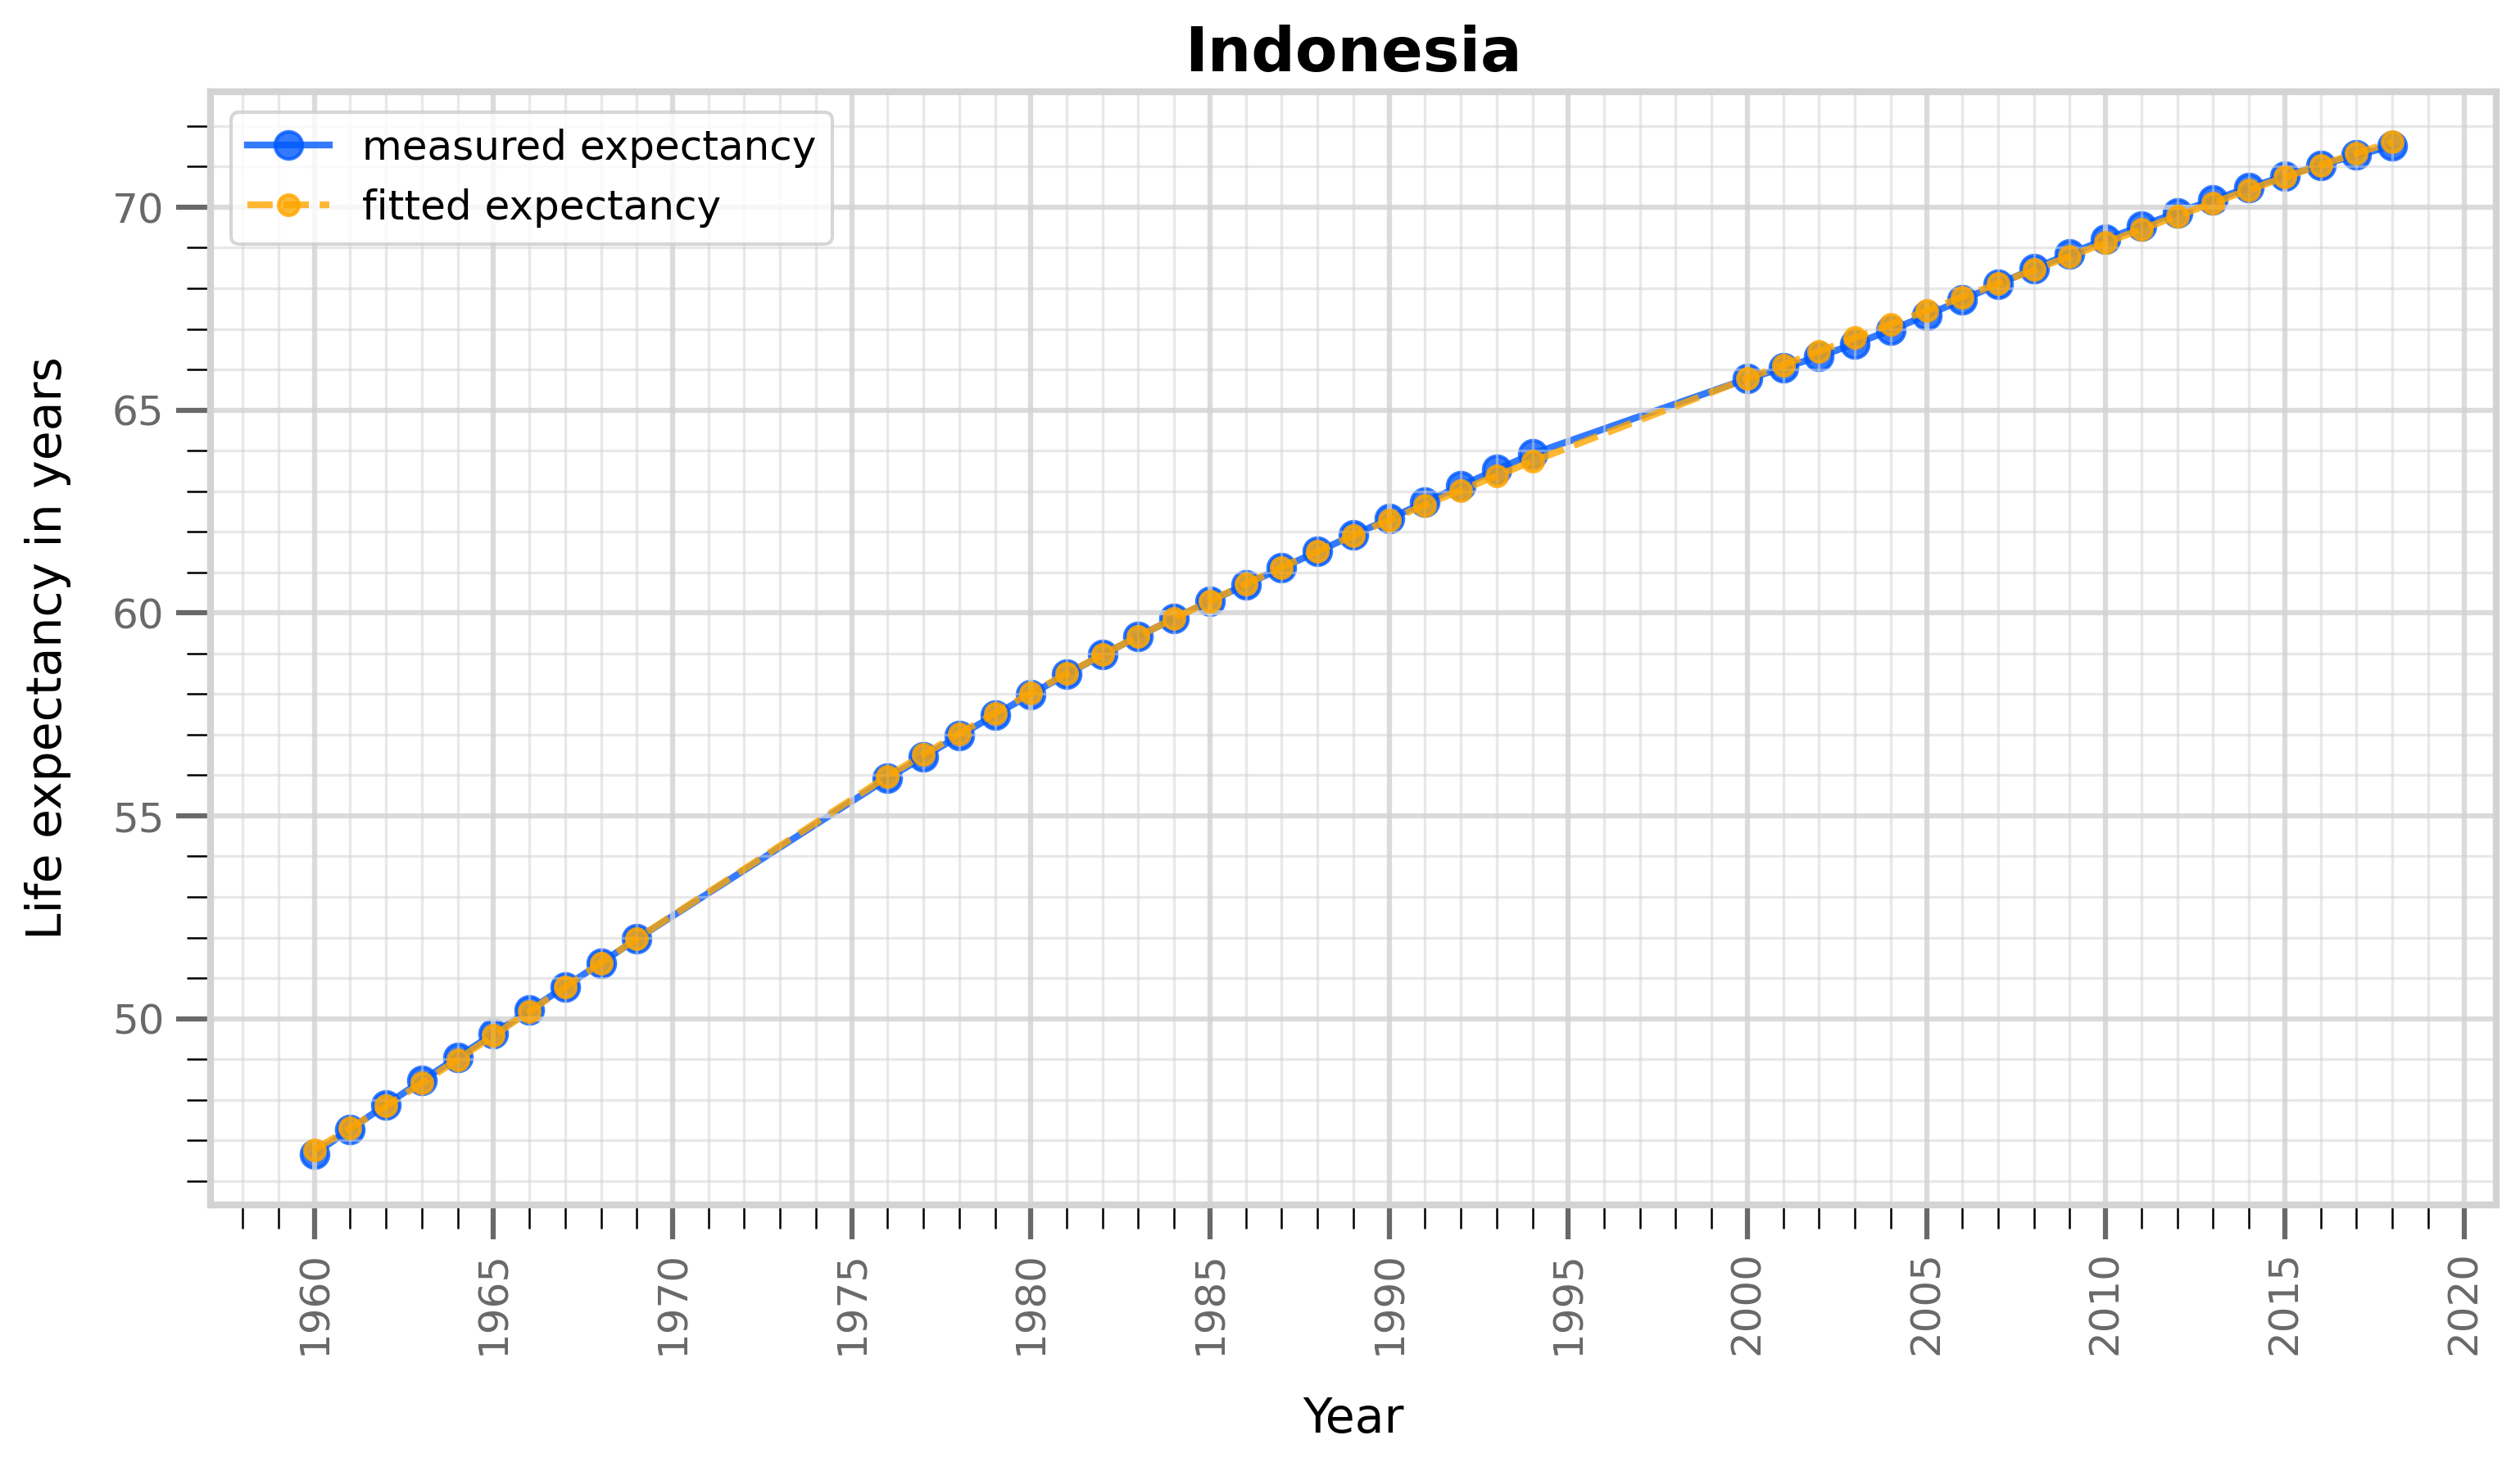

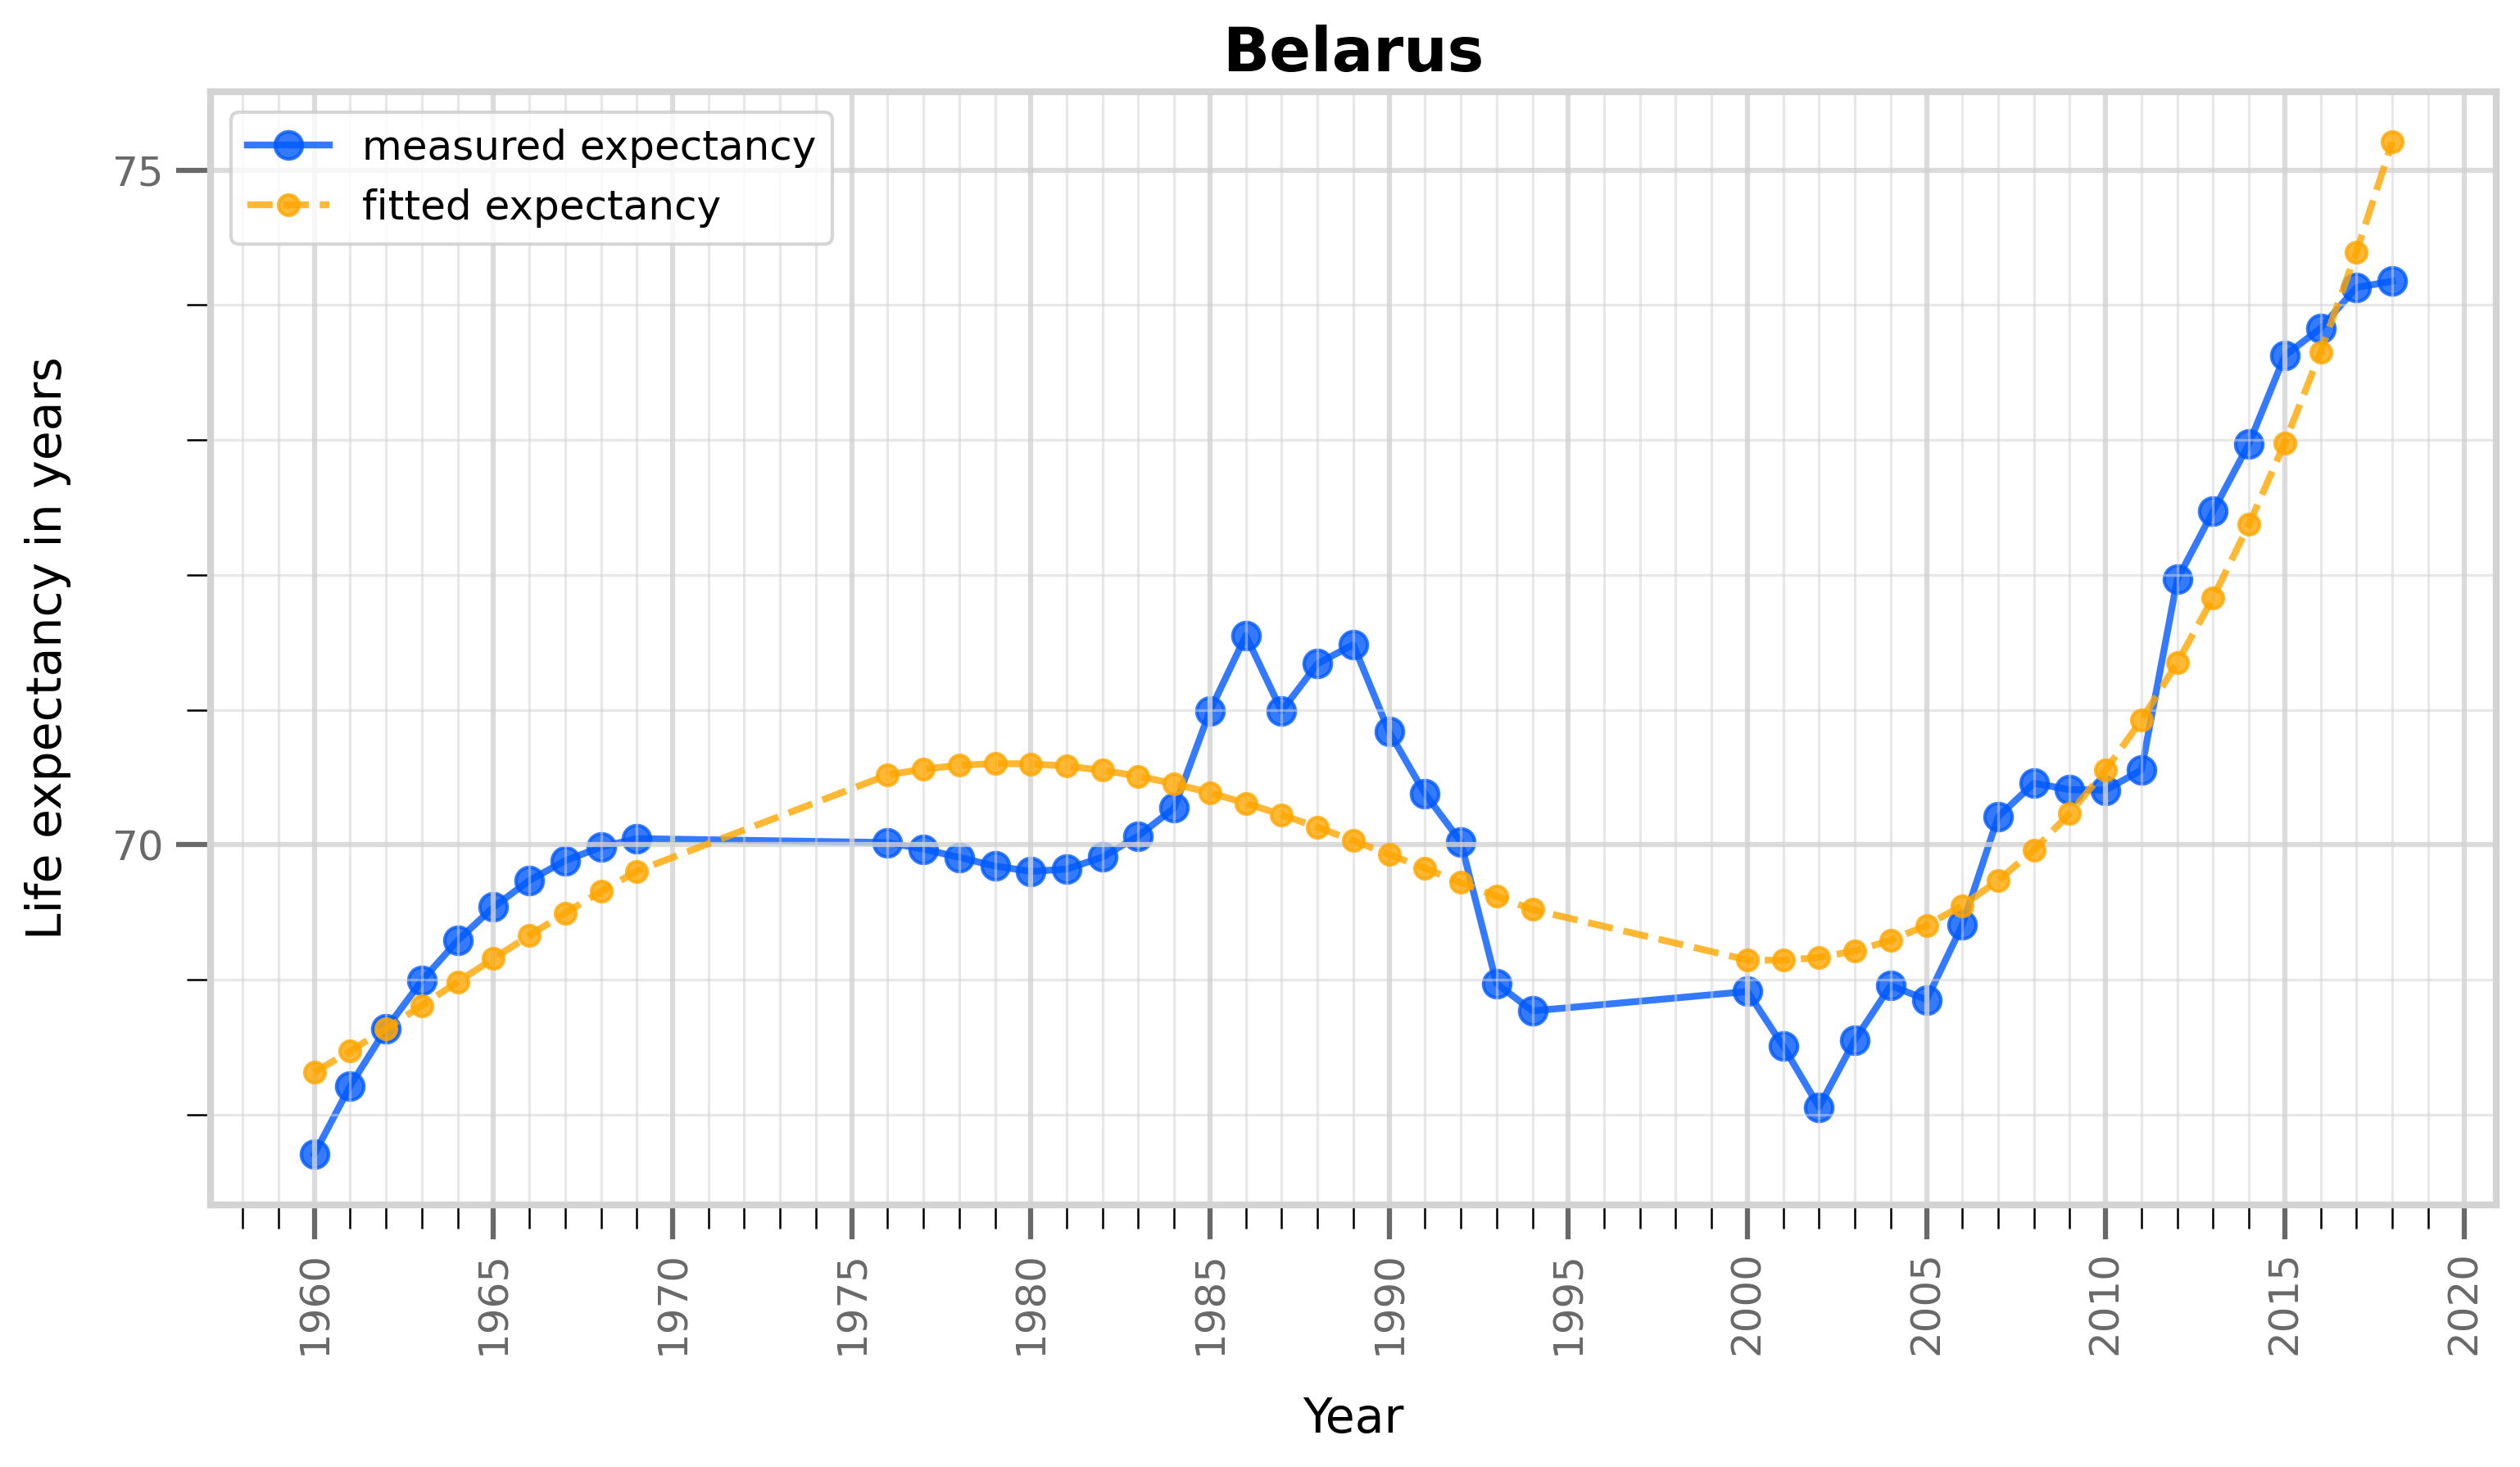

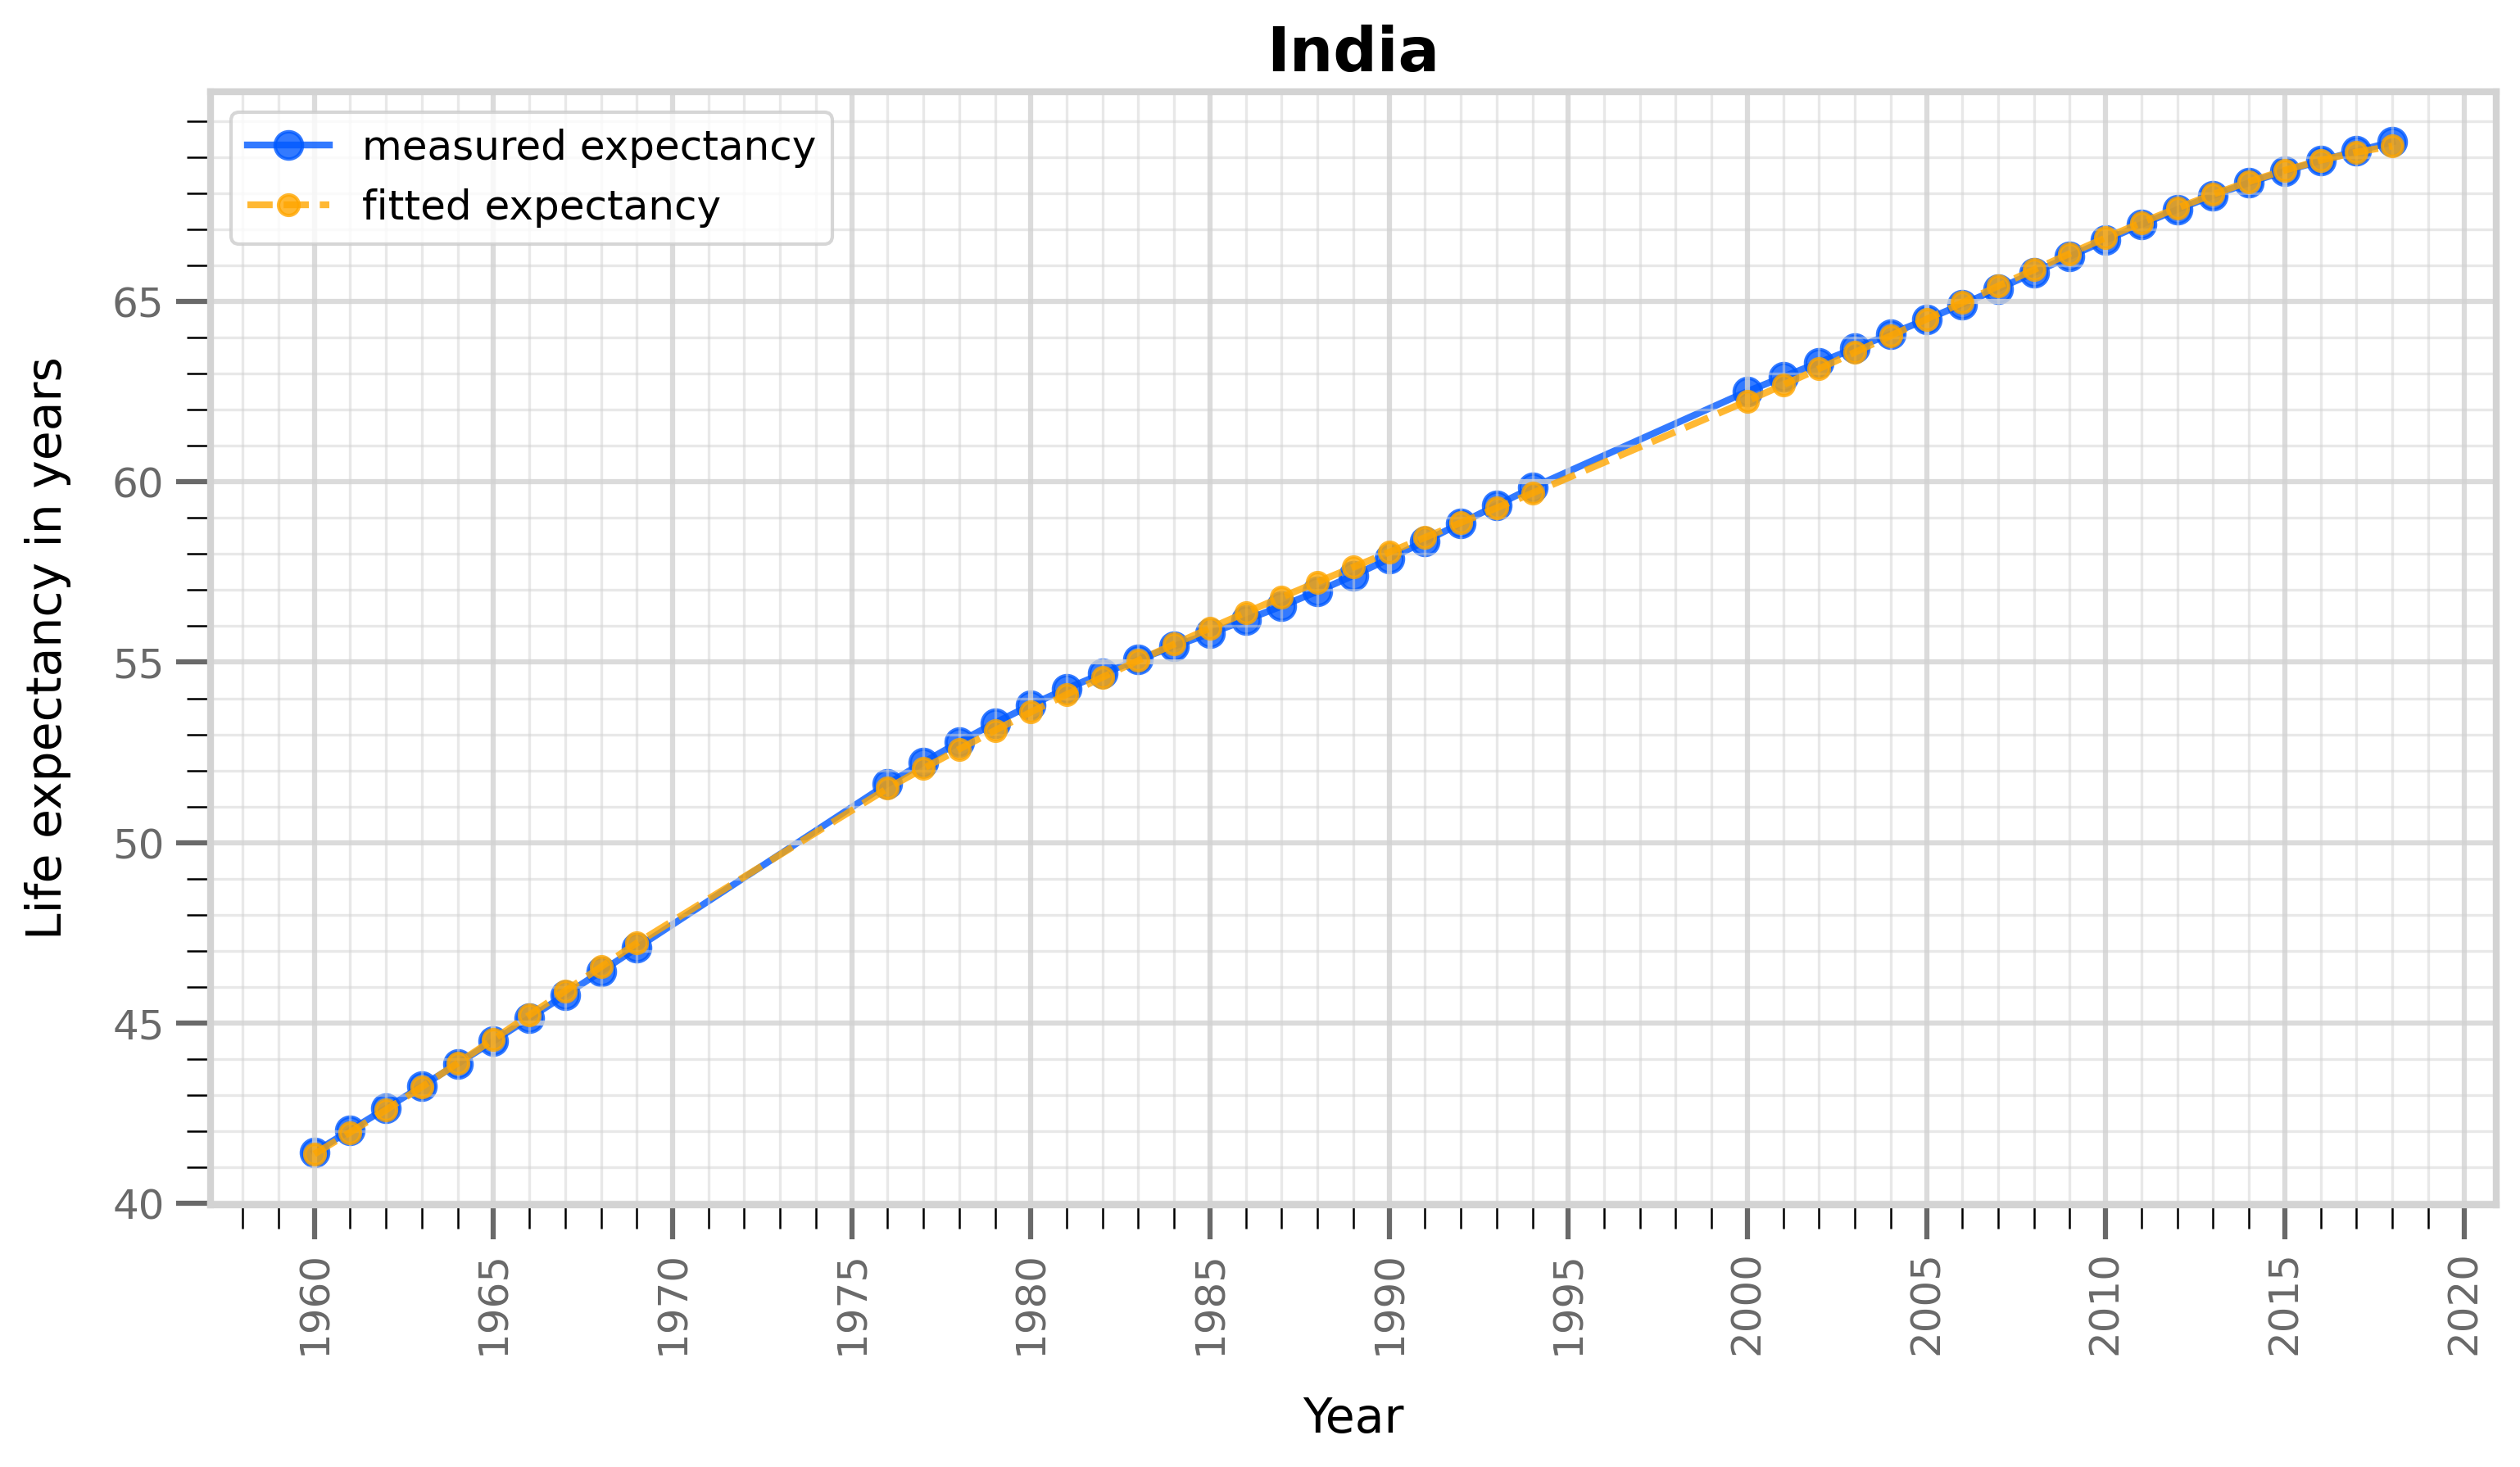

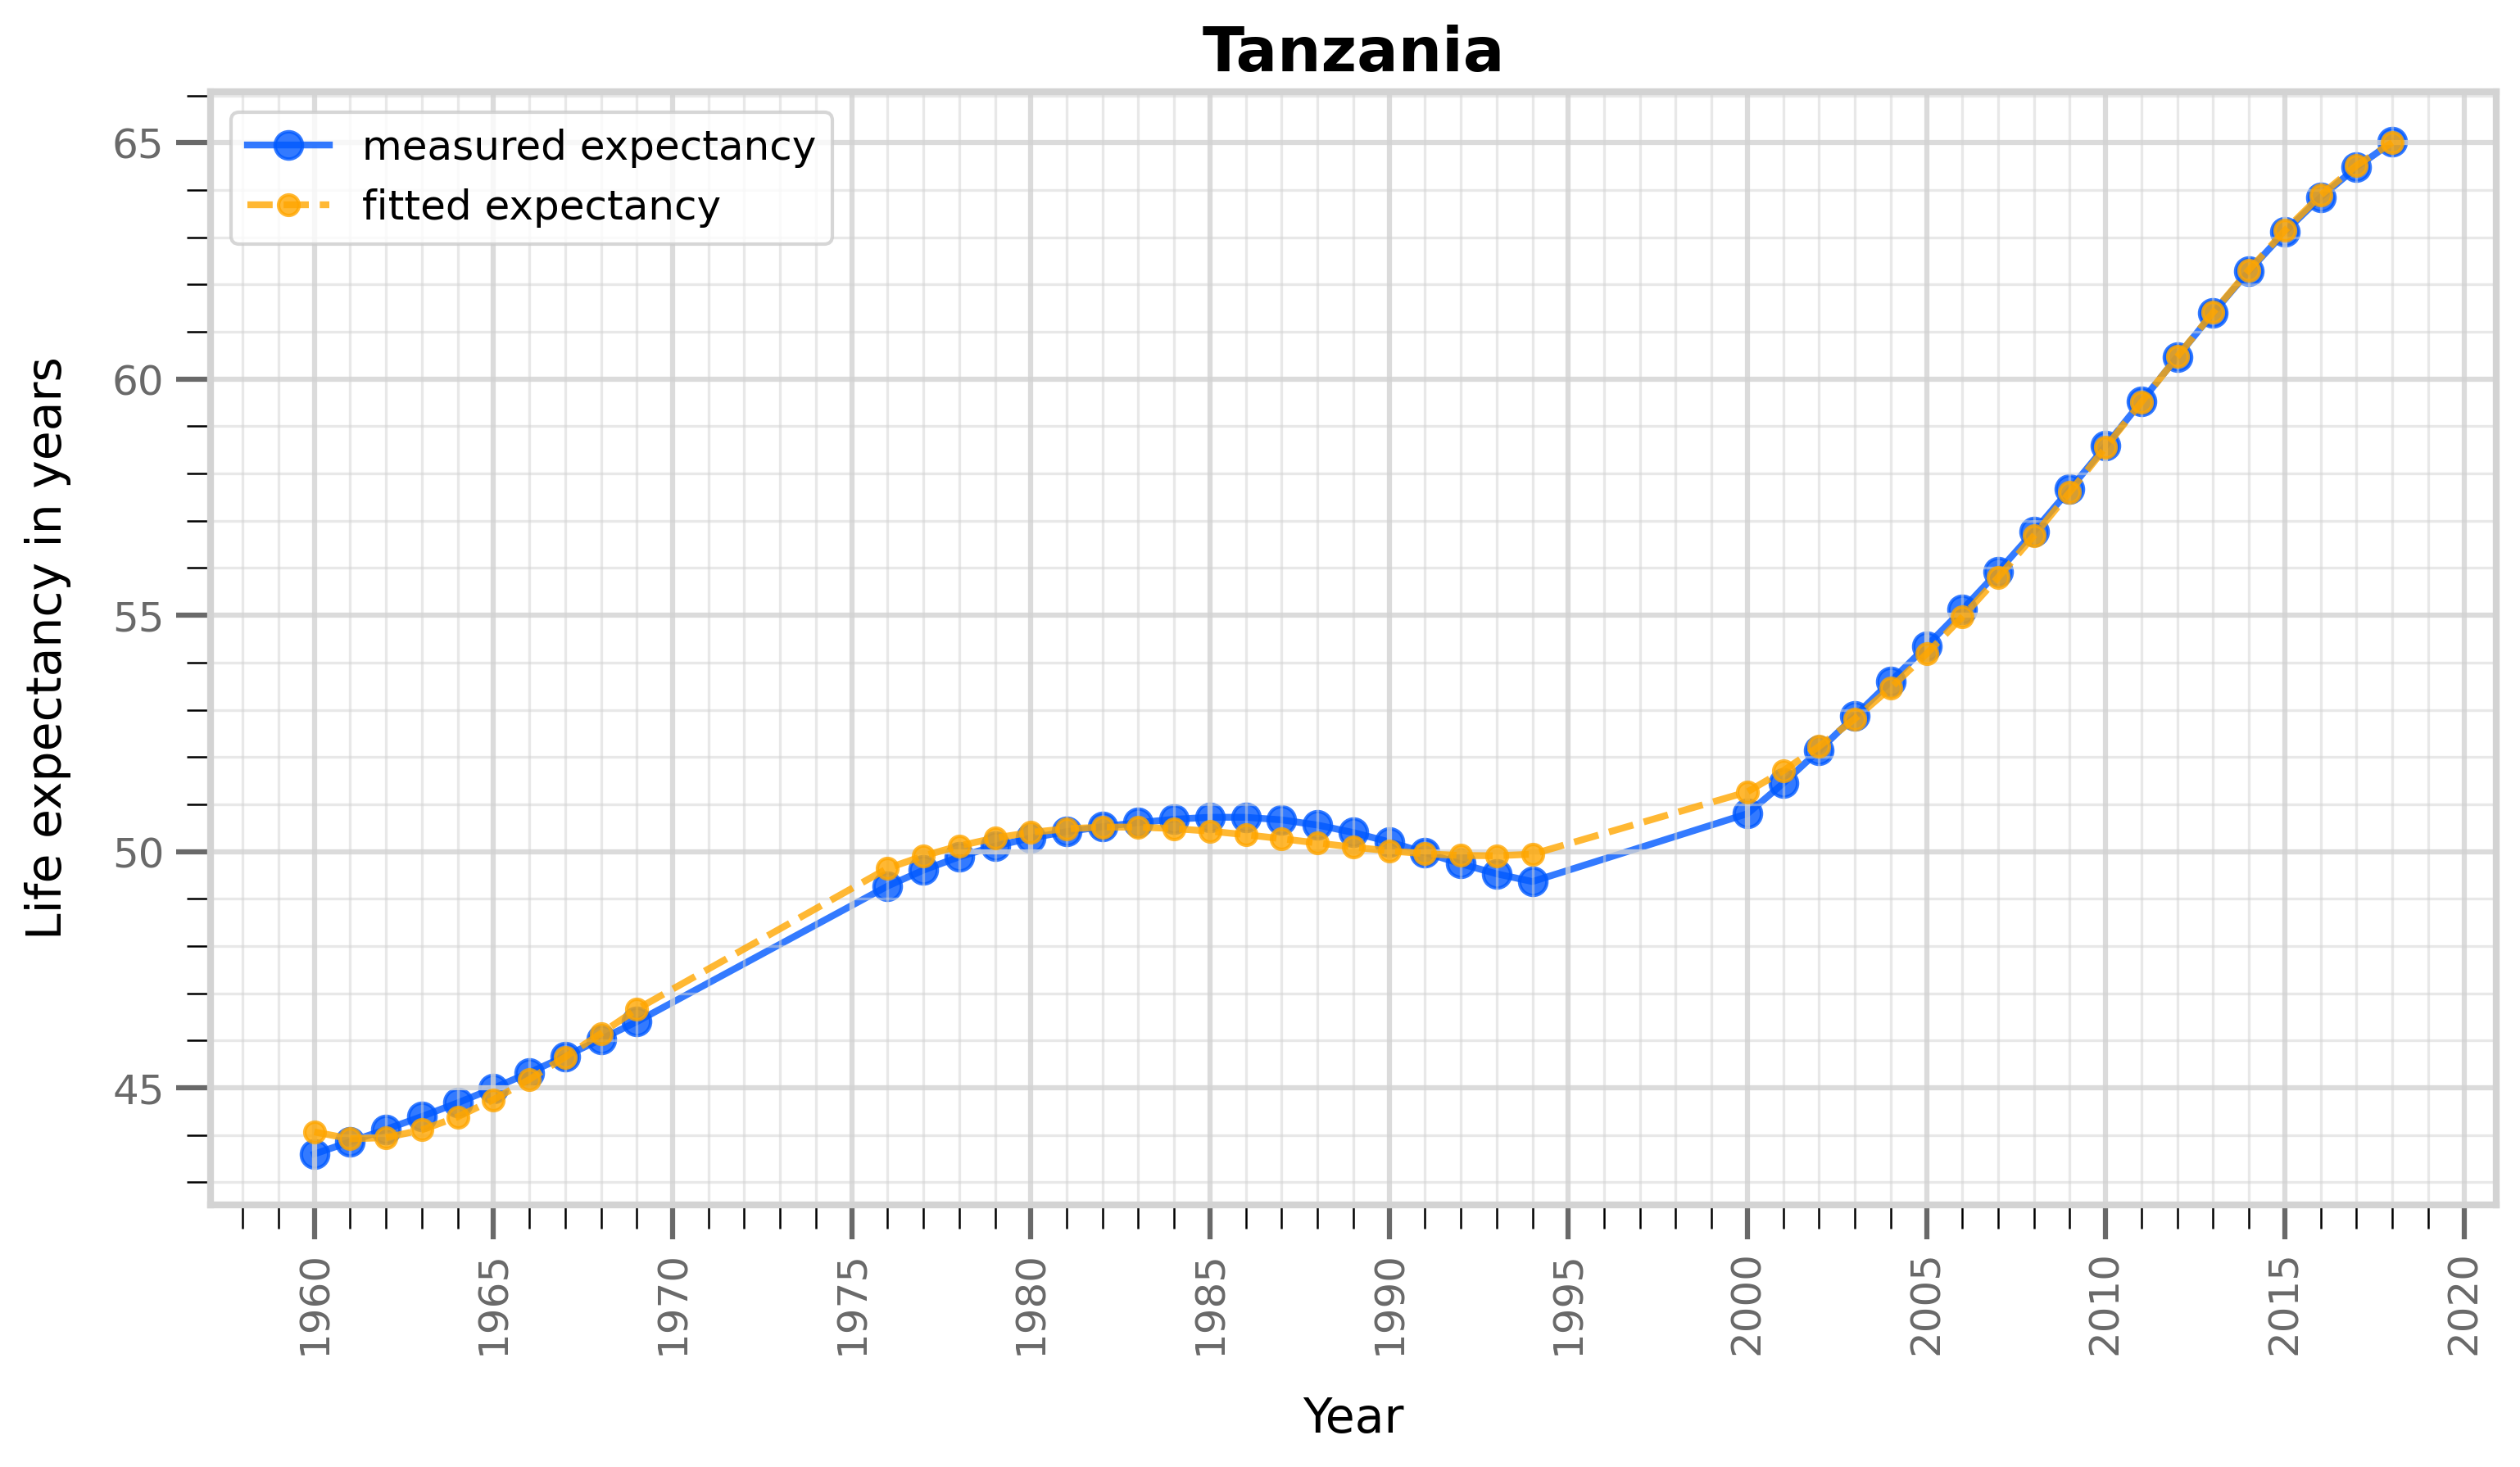

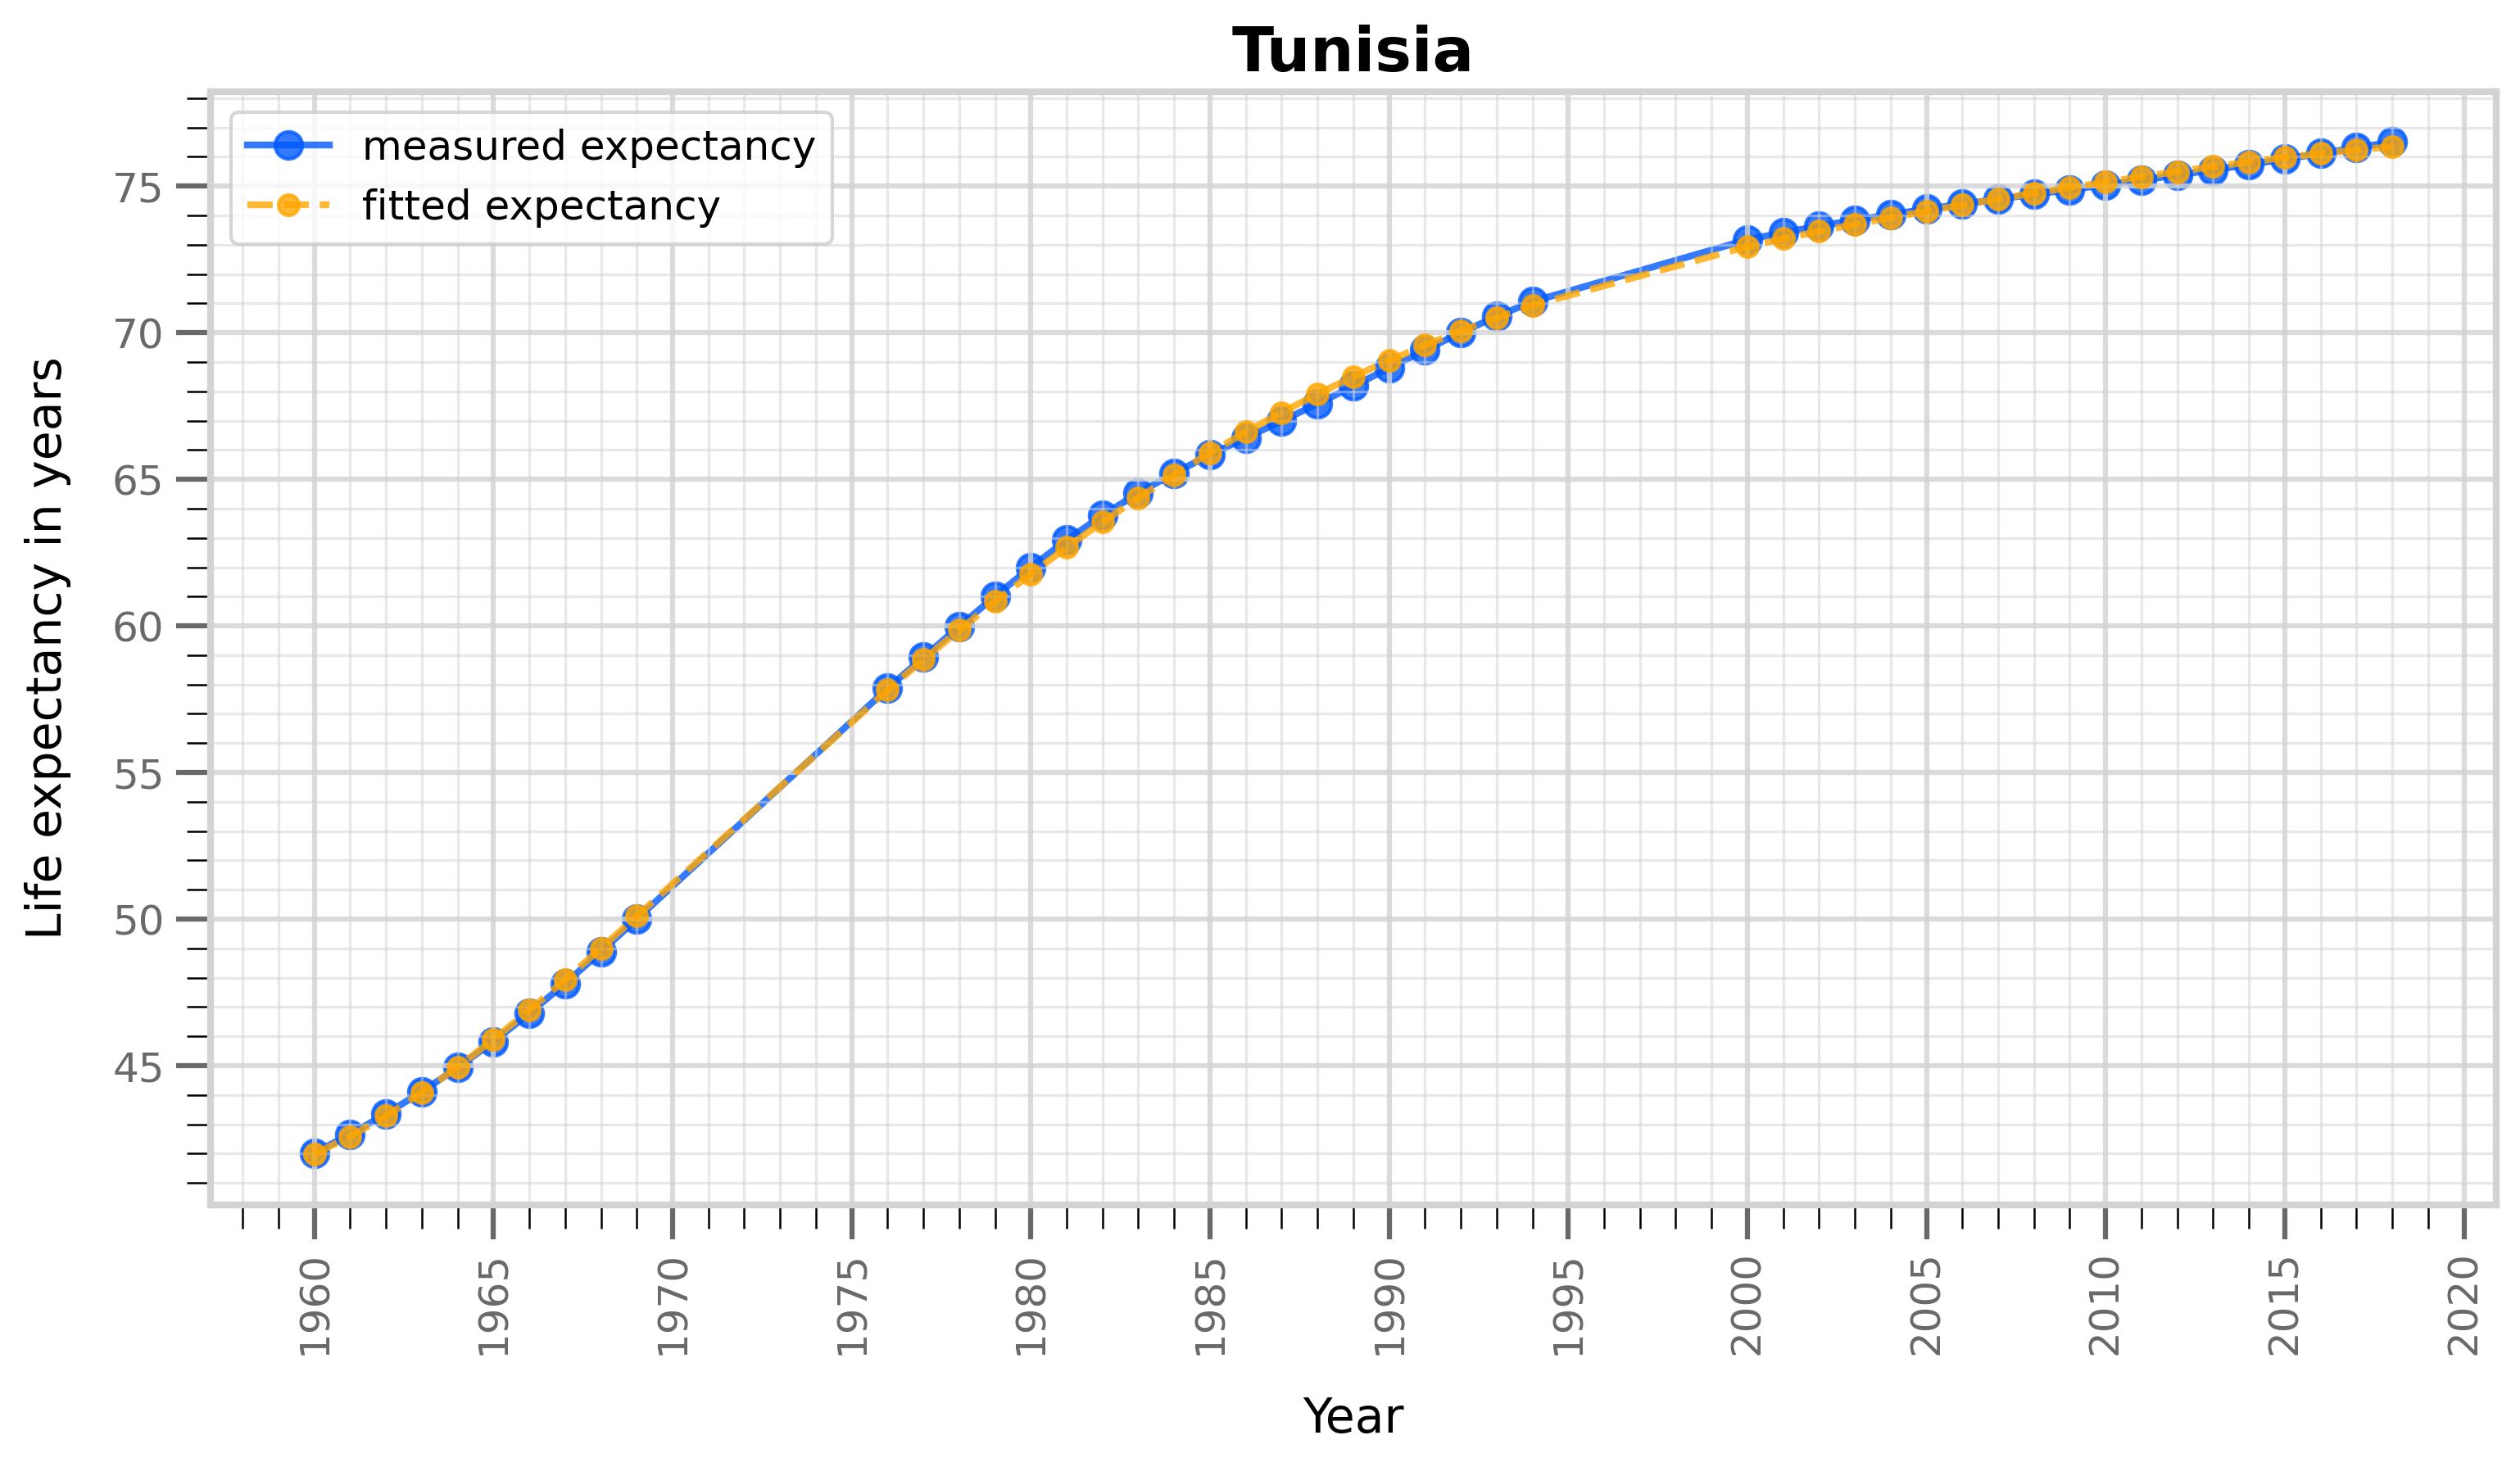

In [11]:

def plot_two_overlain_data_sets(
        title: str, x_label: str, y_label: str, y1_legend: str, y2_legend: str,
        x1_values: List[int], y1_values: List[float],
        x2_values: List[int], y2_values: List[float]) -> None:
    """
    Plots two data sets in one diagram whereat the second data set overlays the first.
    
    The diagram is optimized to be readable and understandable, even if the two data sets 
    partially or completely overlap: the data sets are always clearly distinguishable.
    
    :param title: A title to show above the diagram.
    :param x_label:  A label for the x-axis to show below the diagram.
    :param y_label: A label for the y-axis to show left of the diagram.
    :param y1_legend: A summary of the 1st data set, to show on the legend.
    :param y2_legend: A summary of the 2nd data set, to show on the legend.
    :param x1_values: The x-values of the 1st data set.
    :param y1_values: The y-values of the 1st data set.
    :param x2_values: The x-values of the 2nd data set.
    :param y2_values: The y-values of the 2nd data set.
    
    :returns: None
    """
    check_single_argument(title, str)
    check_single_argument(x_label, str)
    check_single_argument(y_label, str)
    check_single_argument(y1_legend, str)
    check_single_argument(y2_legend, str)

    check_list_argument(x1_values, int)
    check_list_argument(y1_values, float)
    check_list_argument(x2_values, int)
    check_list_argument(y2_values, float)

    plt.figure(dpi=300, figsize=(12, 6))                # resolution and (width, height)
    plt.rc('axes', edgecolor="lightgray", linewidth=2)  # frame around diagram

    plt.grid(which='major', alpha=0.8, color='lightgray', linewidth=1.5)
    plt.grid(which='minor', alpha=0.5, color='lightgray')
    plt.grid(True)

    all_x_values = x1_values + x2_values

    plt.tick_params(axis='both', colors='dimgray', labelsize=12, length=10, width=1.5)
    plt.xticks(np.arange(min(all_x_values), max(all_x_values) + 5, 5), rotation='90')
    plt.yticks(np.arange(0, max(y1_values + y2_values), 5))
    plt.tick_params(which='minor', length=7)
    plt.minorticks_on()

    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, labelpad=12)
    plt.ylabel(y_label, fontsize=14, labelpad=12)

    plt.plot(x1_values, y1_values, label=y1_legend, color=(0, 0.35, 1, 0.8), linewidth=2,
             linestyle="solid", marker="o", markersize=8, zorder=1)
    plt.plot(x2_values, y2_values, label=y2_legend, color=(1, 0.65, 0, 0.8), linewidth=2,
             linestyle="dashed", marker="o", markersize=6, zorder=2)
    plt.legend(loc='upper left', fontsize=12)

    plt.show()


def data_frame_row_lists(data_frame: pd.DataFrame, column_name: str) -> List[List[any]]:
    """
    Returns the values of all rows of a data frame, from a specific column onwards.
    
    The order of the data of the data frame is kept intact.
    
    :param data_frame: A data frame from which to extract values from rows.
    :param column_name: A column at which the extraction begins.
    
    :return: A list of lists of extracted values, where one list corresponds to one row.
    """
    check_single_argument(data_frame, pd.DataFrame)
    check_single_argument(column_name, str)

    # todo: check column exists

    data_frame_row_lists = []

    for index in range(len(data_frame)):
        data_row = data_frame.iloc[index]

        data_frame_row_lists.append(
            data_row.loc[column_name:].values.tolist()  # values from given column onwards
        )

    return data_frame_row_lists


def polynomially_fitted_value_lists(
        x_values: List[int], lists_of_y_values: List[List[float]],
        polynomial_degree: int) -> List[List[float]]:
    """
    Creates lists of lists of polynomially fitted y-axis values.
    
    The fitting is based on one list of x-axis values, and applied to multiple lists of 
    y-axis values. 
    
    Since list values are processed in the order they are given to this function,
    any order inherent to the input data is transferred to and reflected by the output 
    data.
    
    :param x_values: A list of x-axis values to use for fitting every y-axis value list.
    :param lists_of_y_values: A list of lists of y-axis values to individually fit.
    :param polynomial_degree: A degree for the polynomials used in the process.
    
    :return: A list of lists of fitted y-axis values.
    """
    check_list_argument(x_values, int)
    check_list_of_lists_argument(lists_of_y_values, float)
    check_single_argument(polynomial_degree, int)

    fitted_y_value_lists = []

    for y_values in lists_of_y_values:
        coefficients = np.polyfit(x_values, y_values, polynomial_degree)
        polynomial   = np.poly1d(coefficients)

        fitted_y_value_lists.append(
            polynomial(x_values).tolist()
        )

    return fitted_y_value_lists


# suppress warnings about polynomial fit quality
warnings.simplefilter('ignore', np.RankWarning)

# years from 1960 to 2018, without 1970 to 1975 and 1995 to 1999
partial_years = list(range(1960, 1970)) + list(range(1976, 1995)) \
                + list(range(2000, 2019))

random_country_dataframe = expectancy_dataframe.sample(5)

#  the order of these two lists' 1st levels corresponds to the order of the countries
#  and the order of their 2nd levels corresponds to the order of the years
expectancy_lists        : List[List[float]] = \
    data_frame_row_lists(random_country_dataframe, "1960")

fitted_expectancy_lists : List[List[float]] = \
    polynomially_fitted_value_lists(partial_years, expectancy_lists, 6)

# plot fitted expectancies over measured expectancies
for country_index in range(len(random_country_dataframe)):
    plot_two_overlain_data_sets(
        random_country_dataframe.iloc[country_index].loc["Country_Name"],
        "Year", "Life expectancy in years", "measured expectancy", "fitted expectancy",
        partial_years, expectancy_lists[country_index],
        partial_years, fitted_expectancy_lists[country_index]
    )

### Task 3

#### Goals
1. Interpolate the life expectancy, of the previously taken country samples,
including the missing years from 1970 to 1975 and from 1995 to 1999. 
2. Subsequently, plot five graphs which overlay the interpolated life expectancy data and 
the original life expectancy data. 
3. And finally, display a data frame, in order to report the missing years' interpolated 
life expectancies by country.

#### Approach

For each randomly chosen country 
[scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)
is applied to given years and expectancies, in order to create interpolation functions, 
which are applied to missing years, to create interpolated life expectancies.


#### References
* <sup>11</sup> Roee Adler (2009): How do I exchange keys with values in a dictionary? 
Available online at https://stackoverflow.com/q/1031851, updated on 1/21/2021, checked on 
7/1/2021.
* <sup>12</sup> user1642513 (2013): Change column type in pandas. Available online at 
https://stackoverflow.com/q/15891038, updated on 5/18/2021, checked on 7/2/2021.

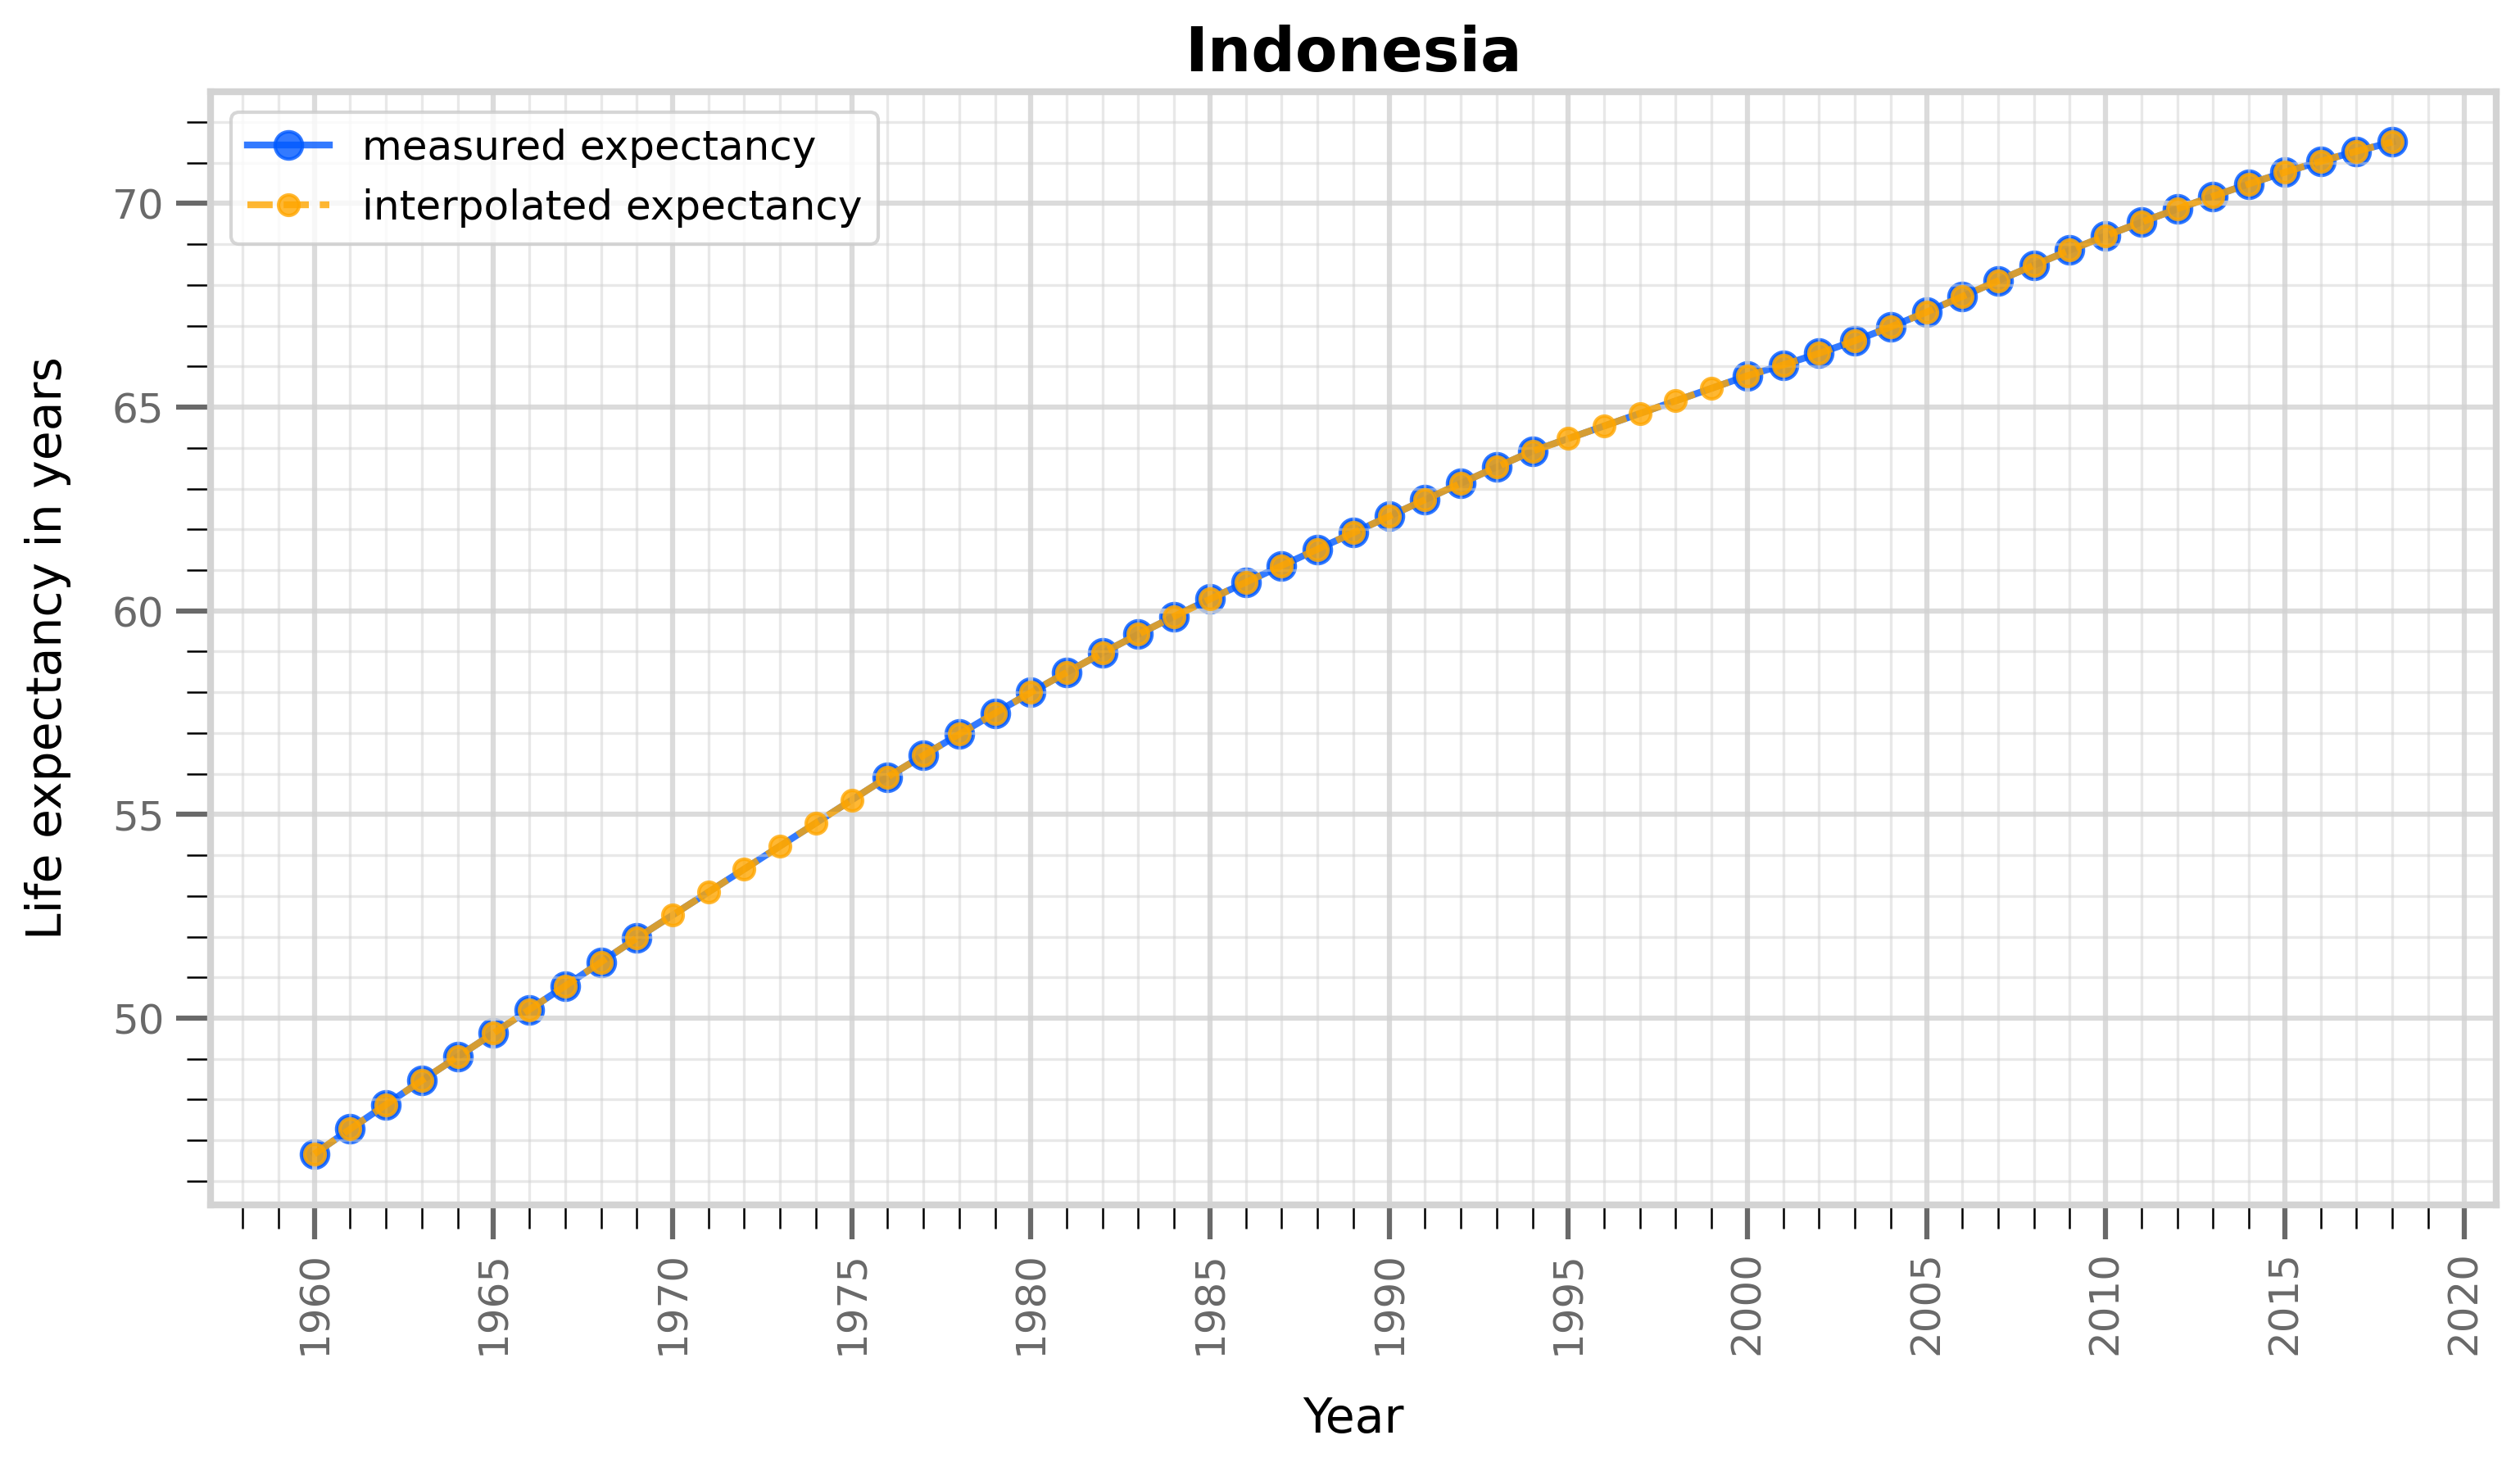

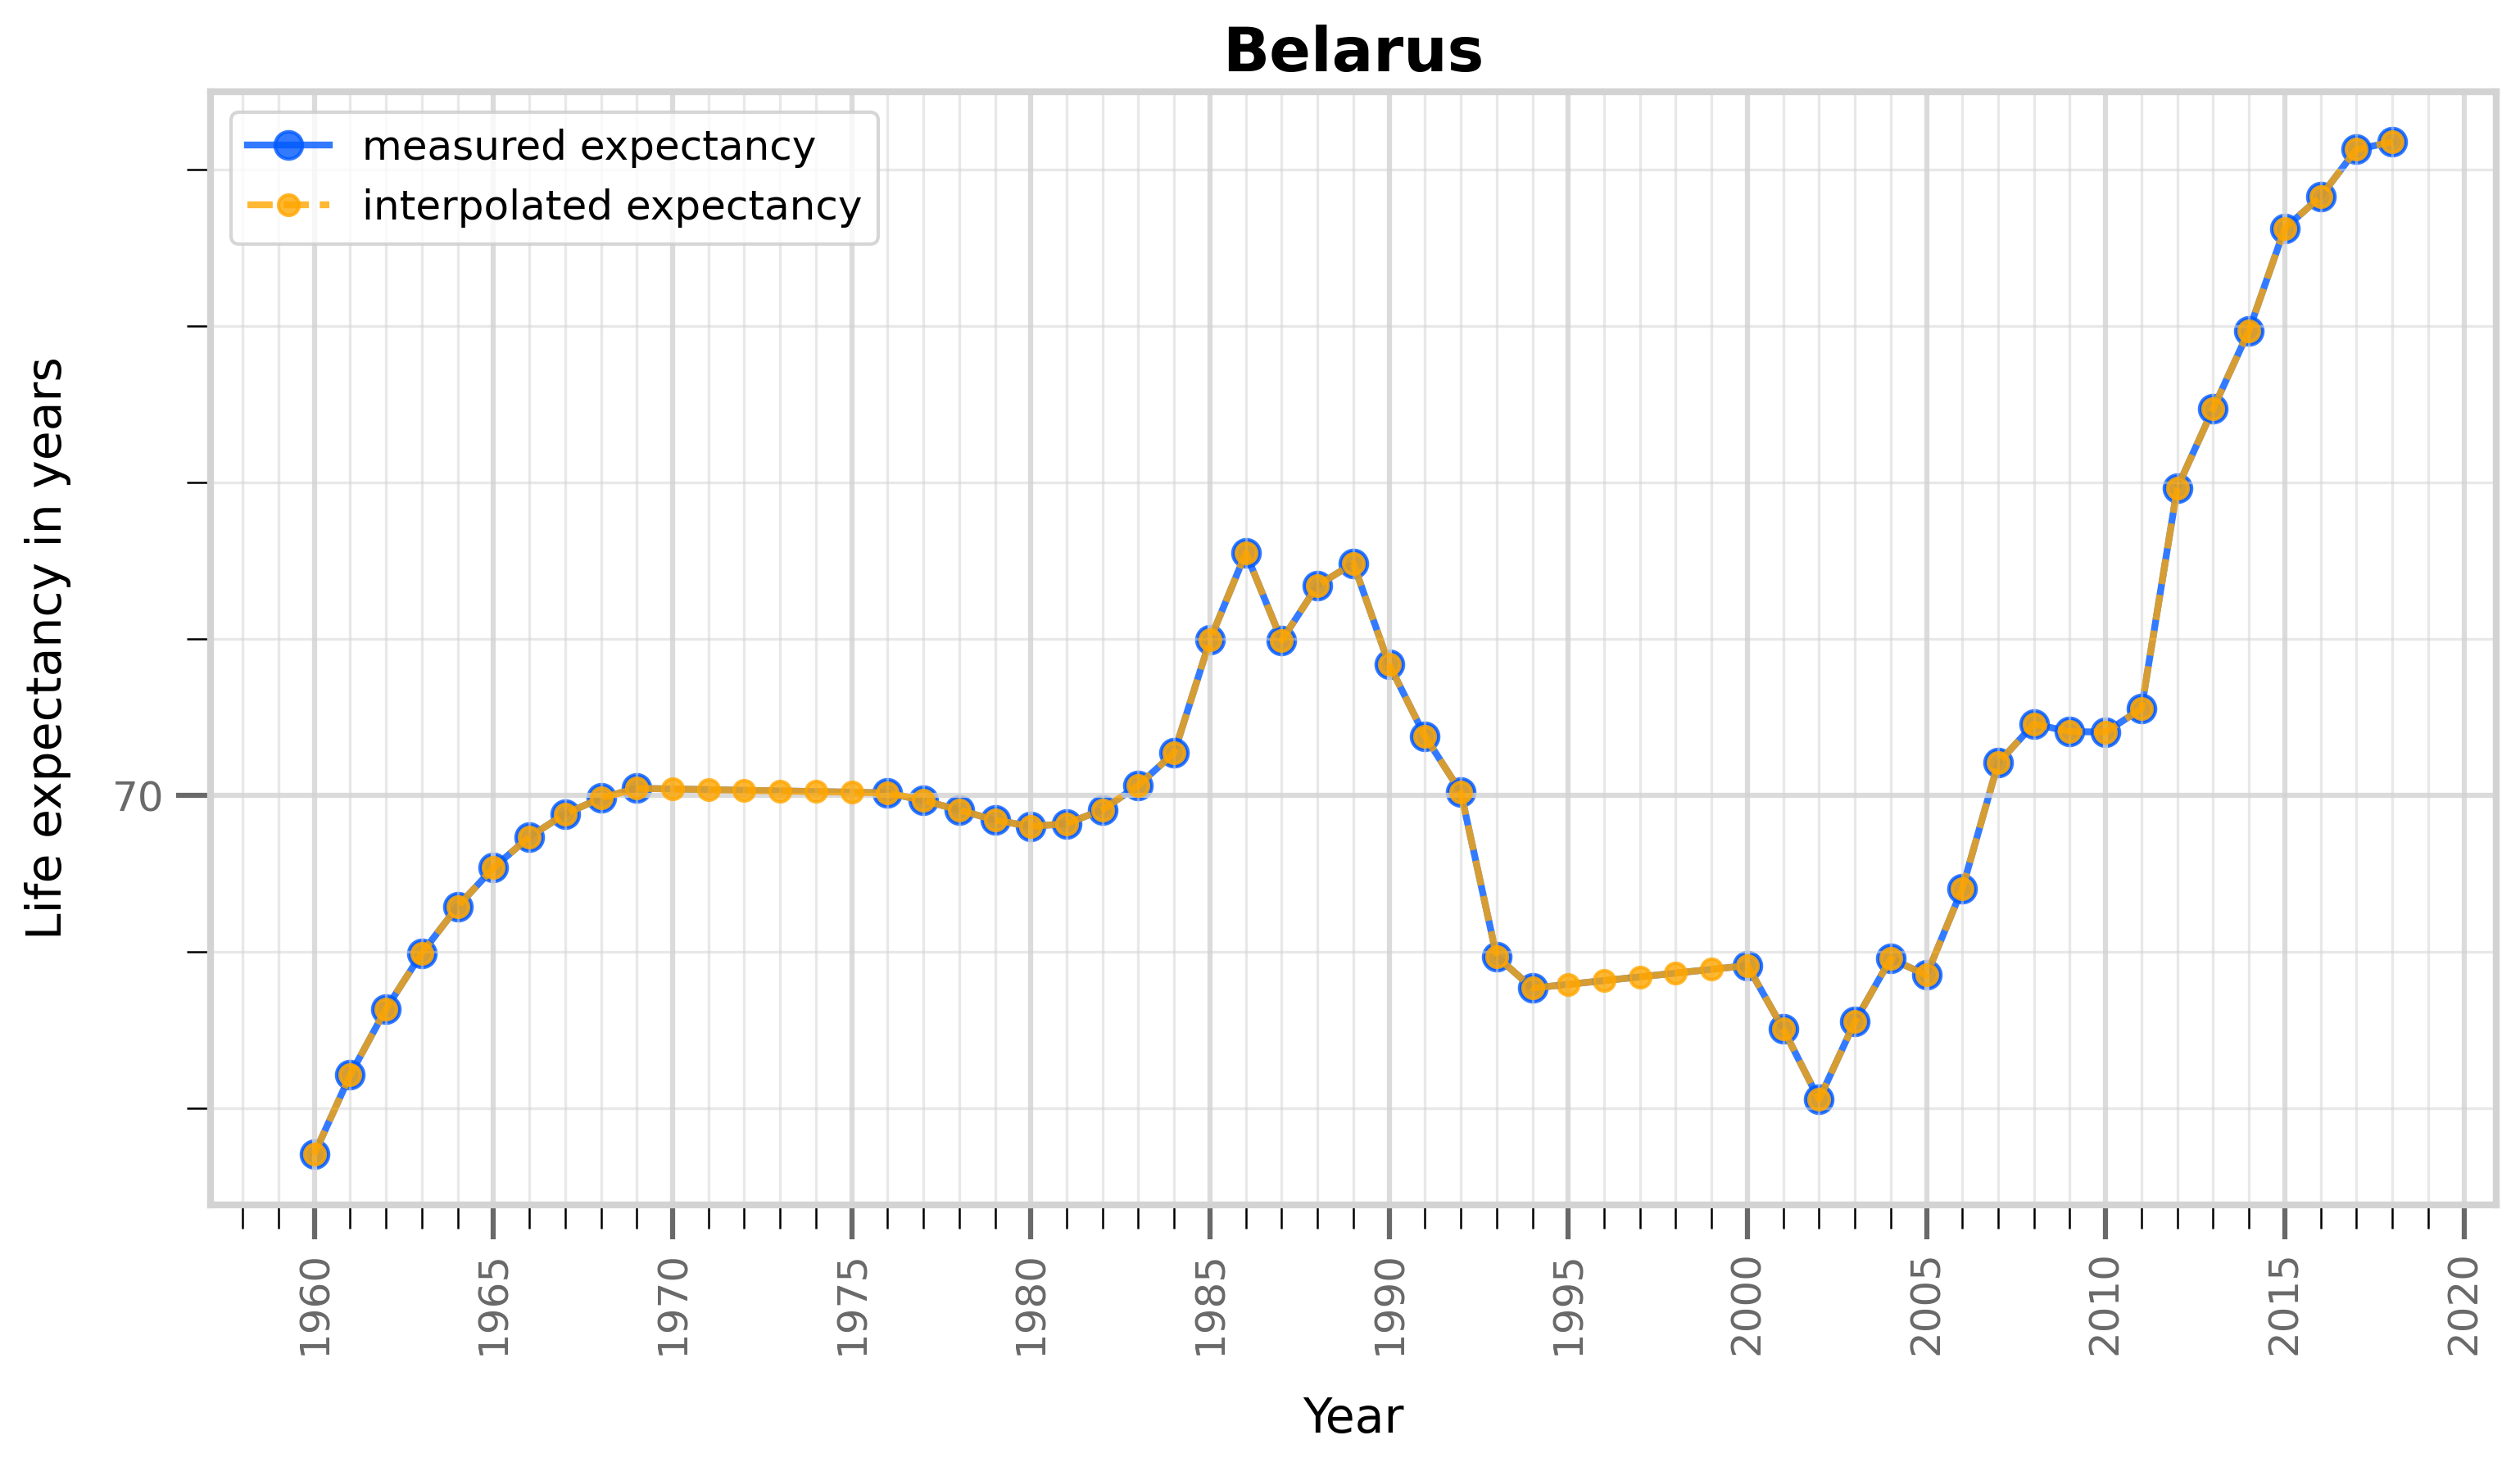

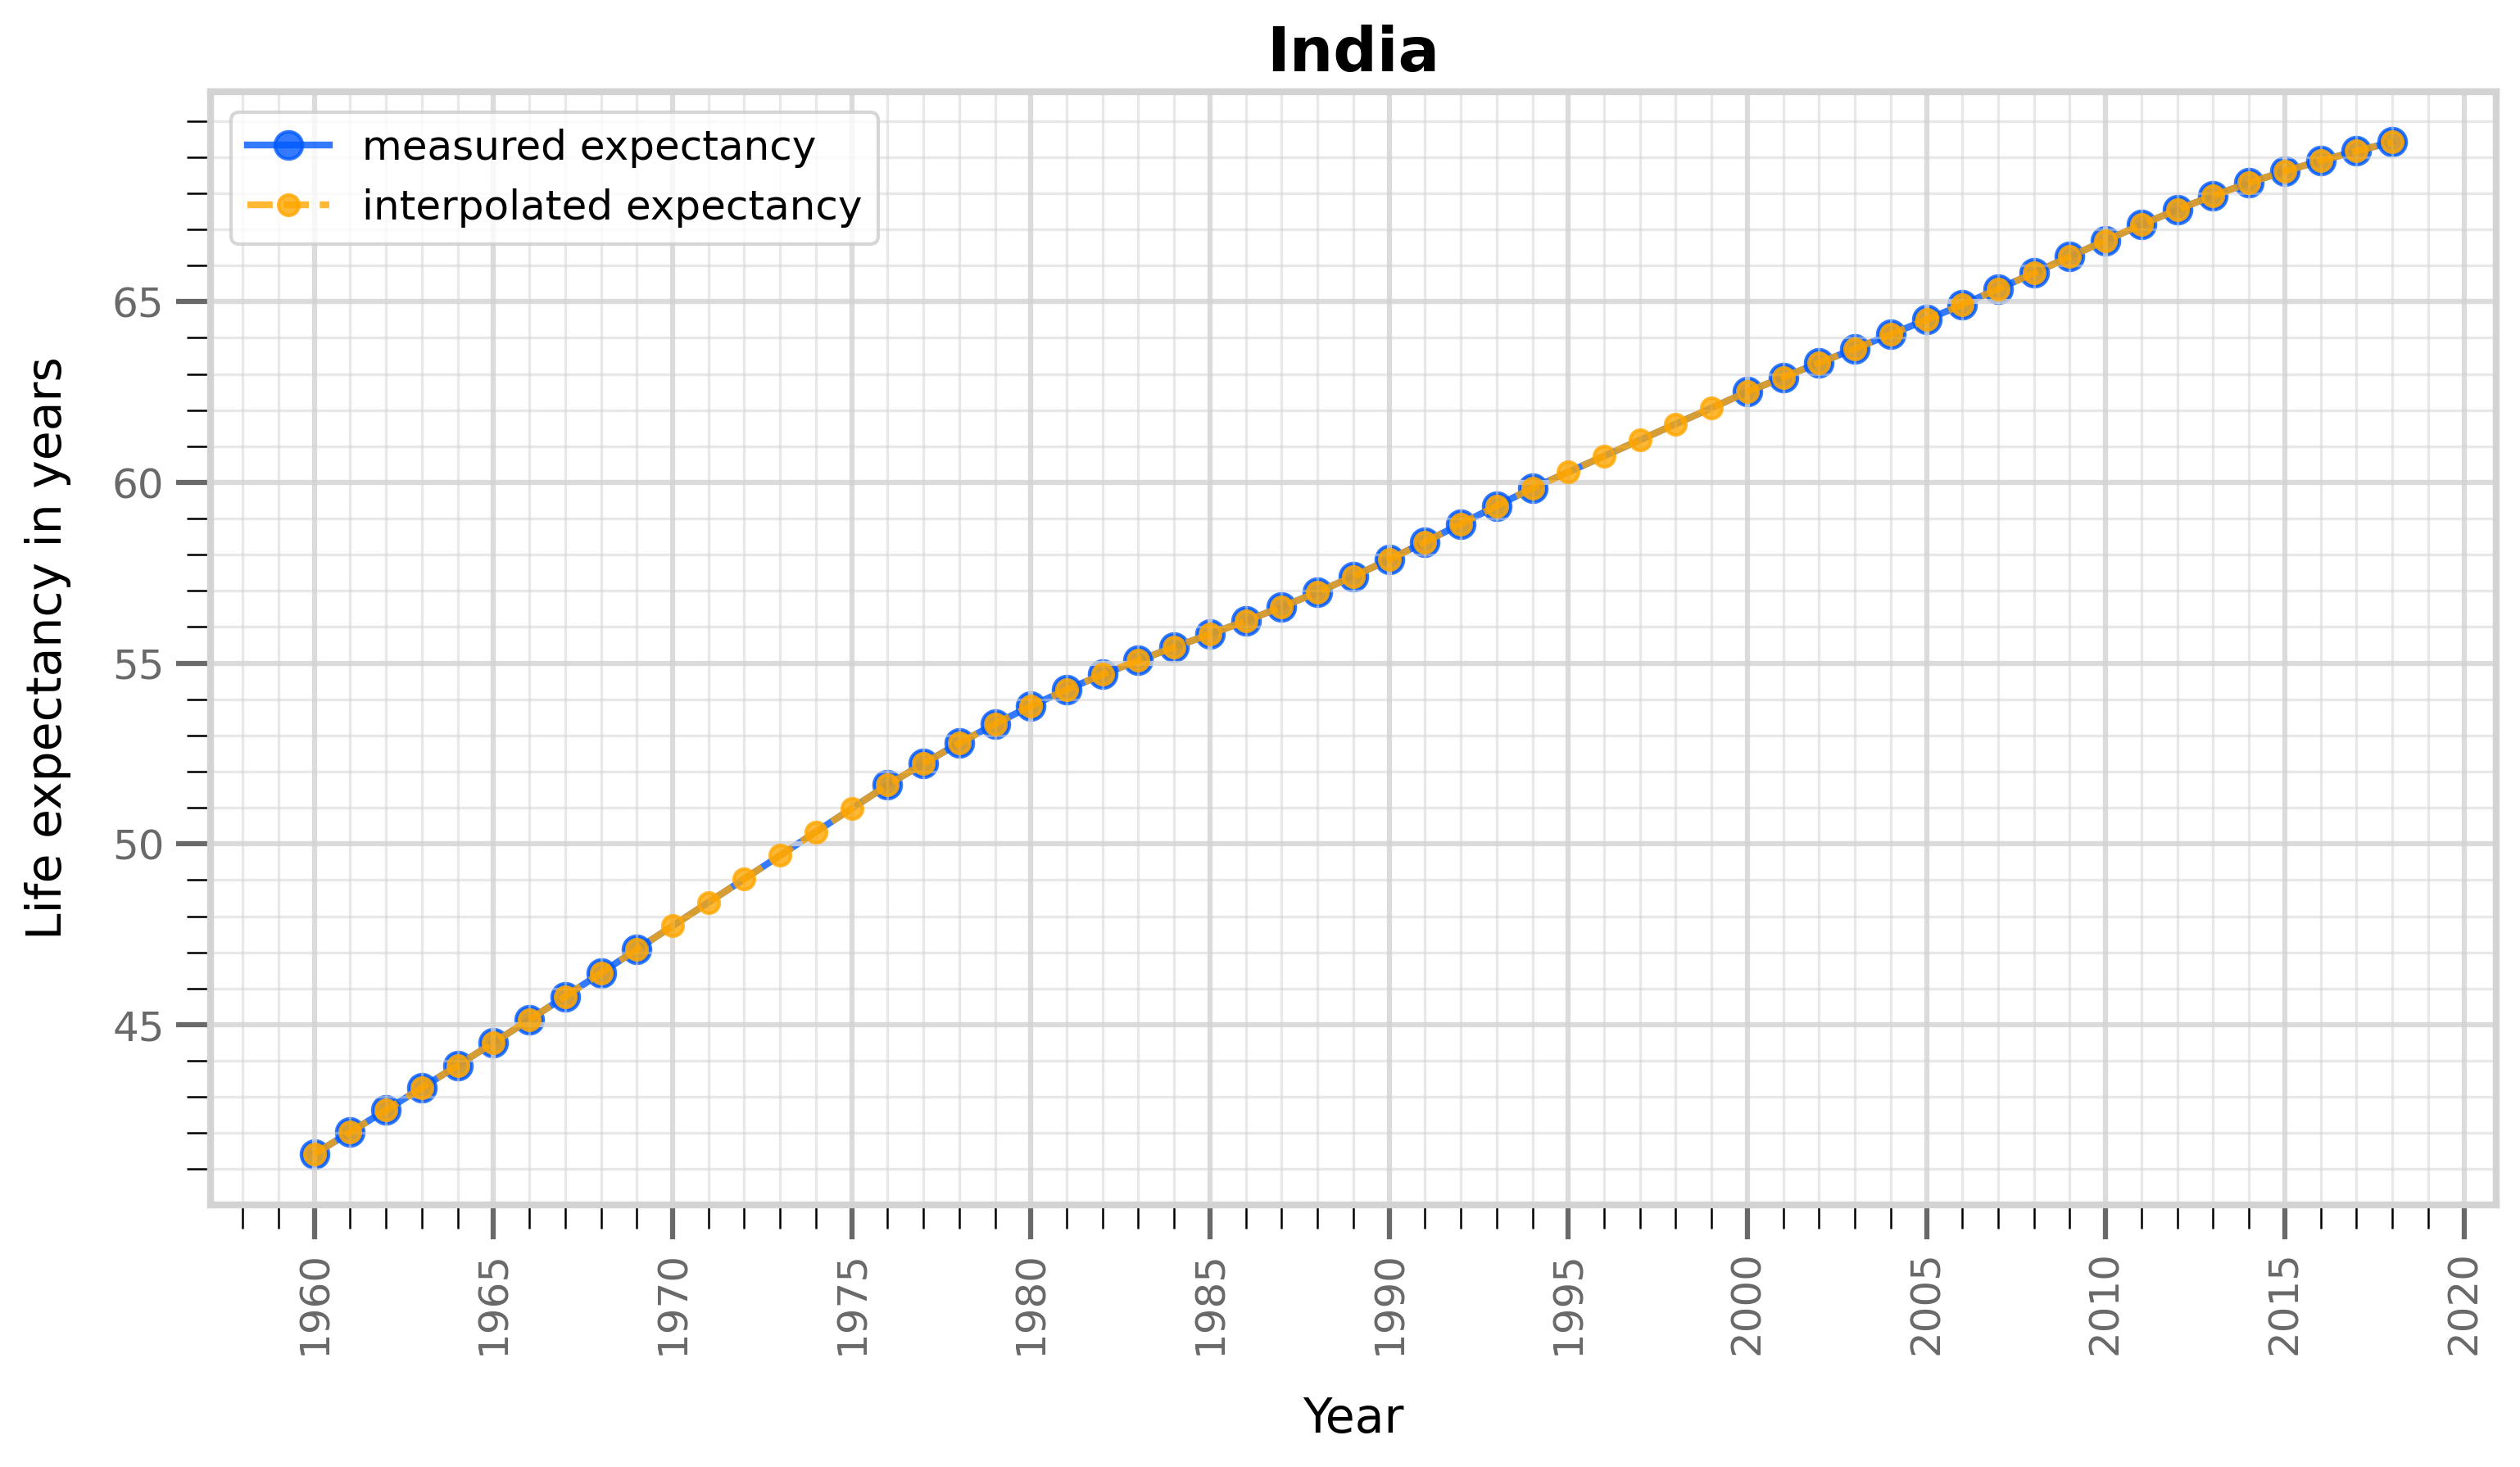

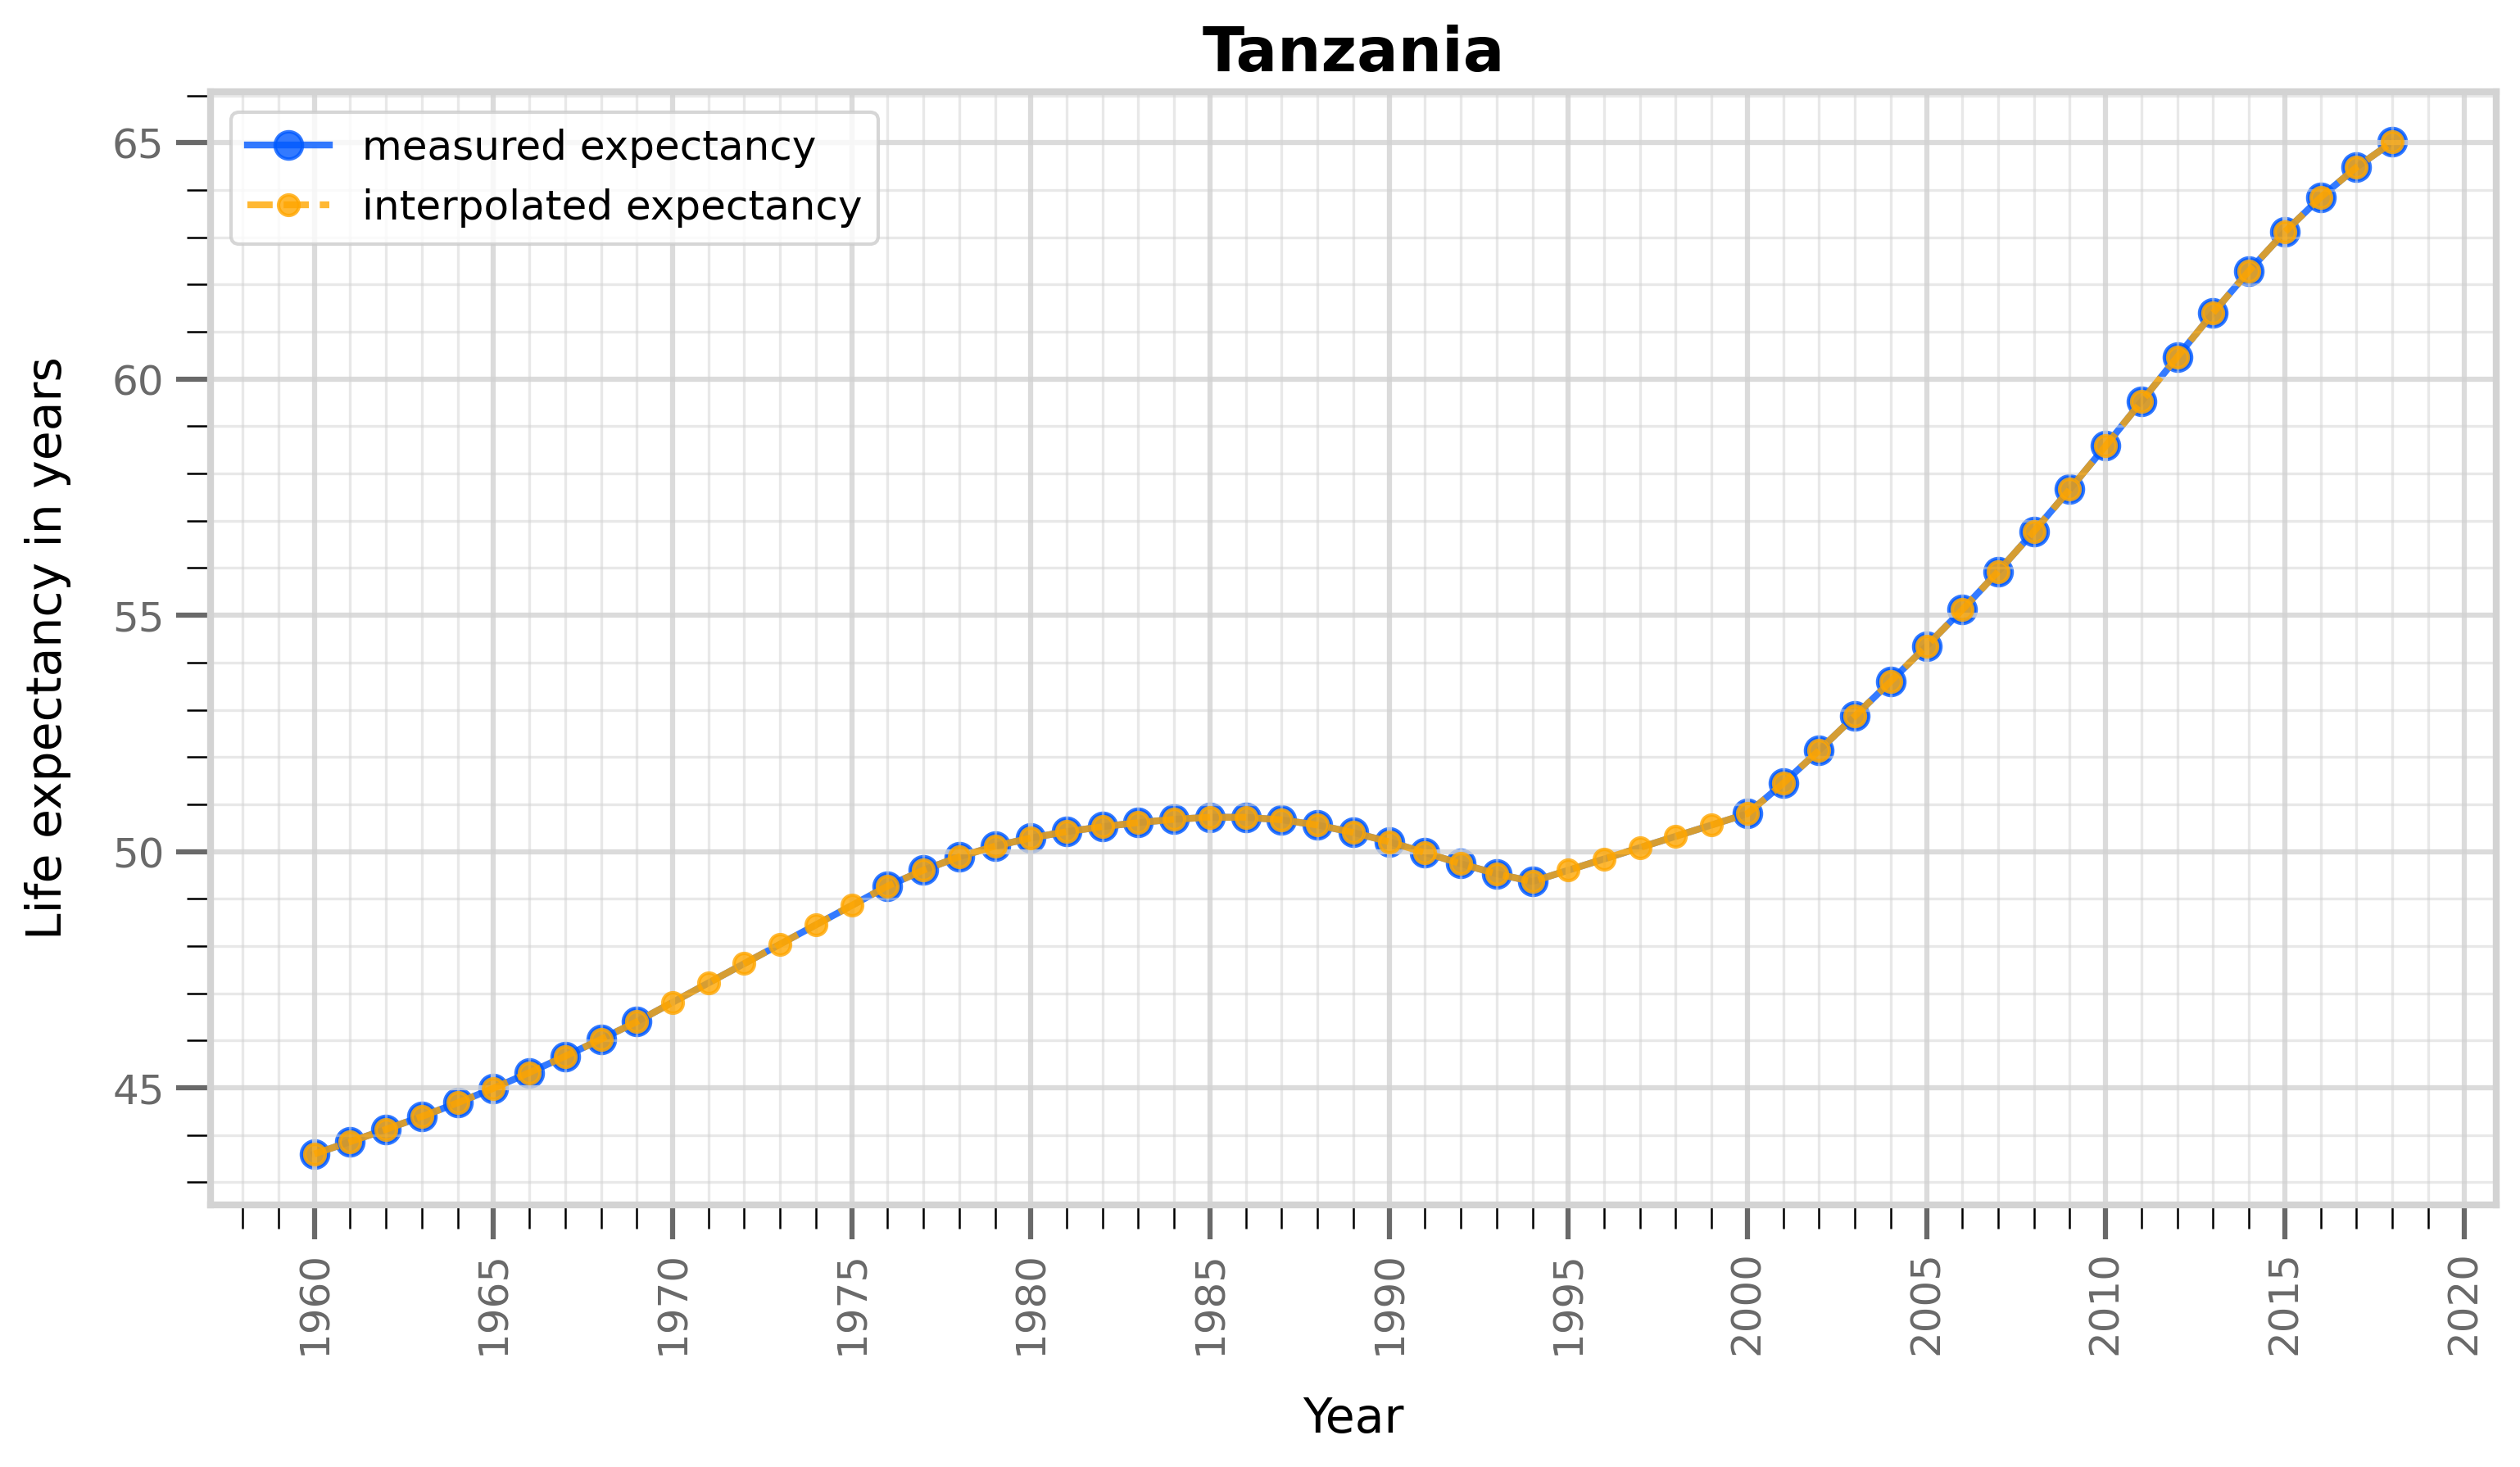

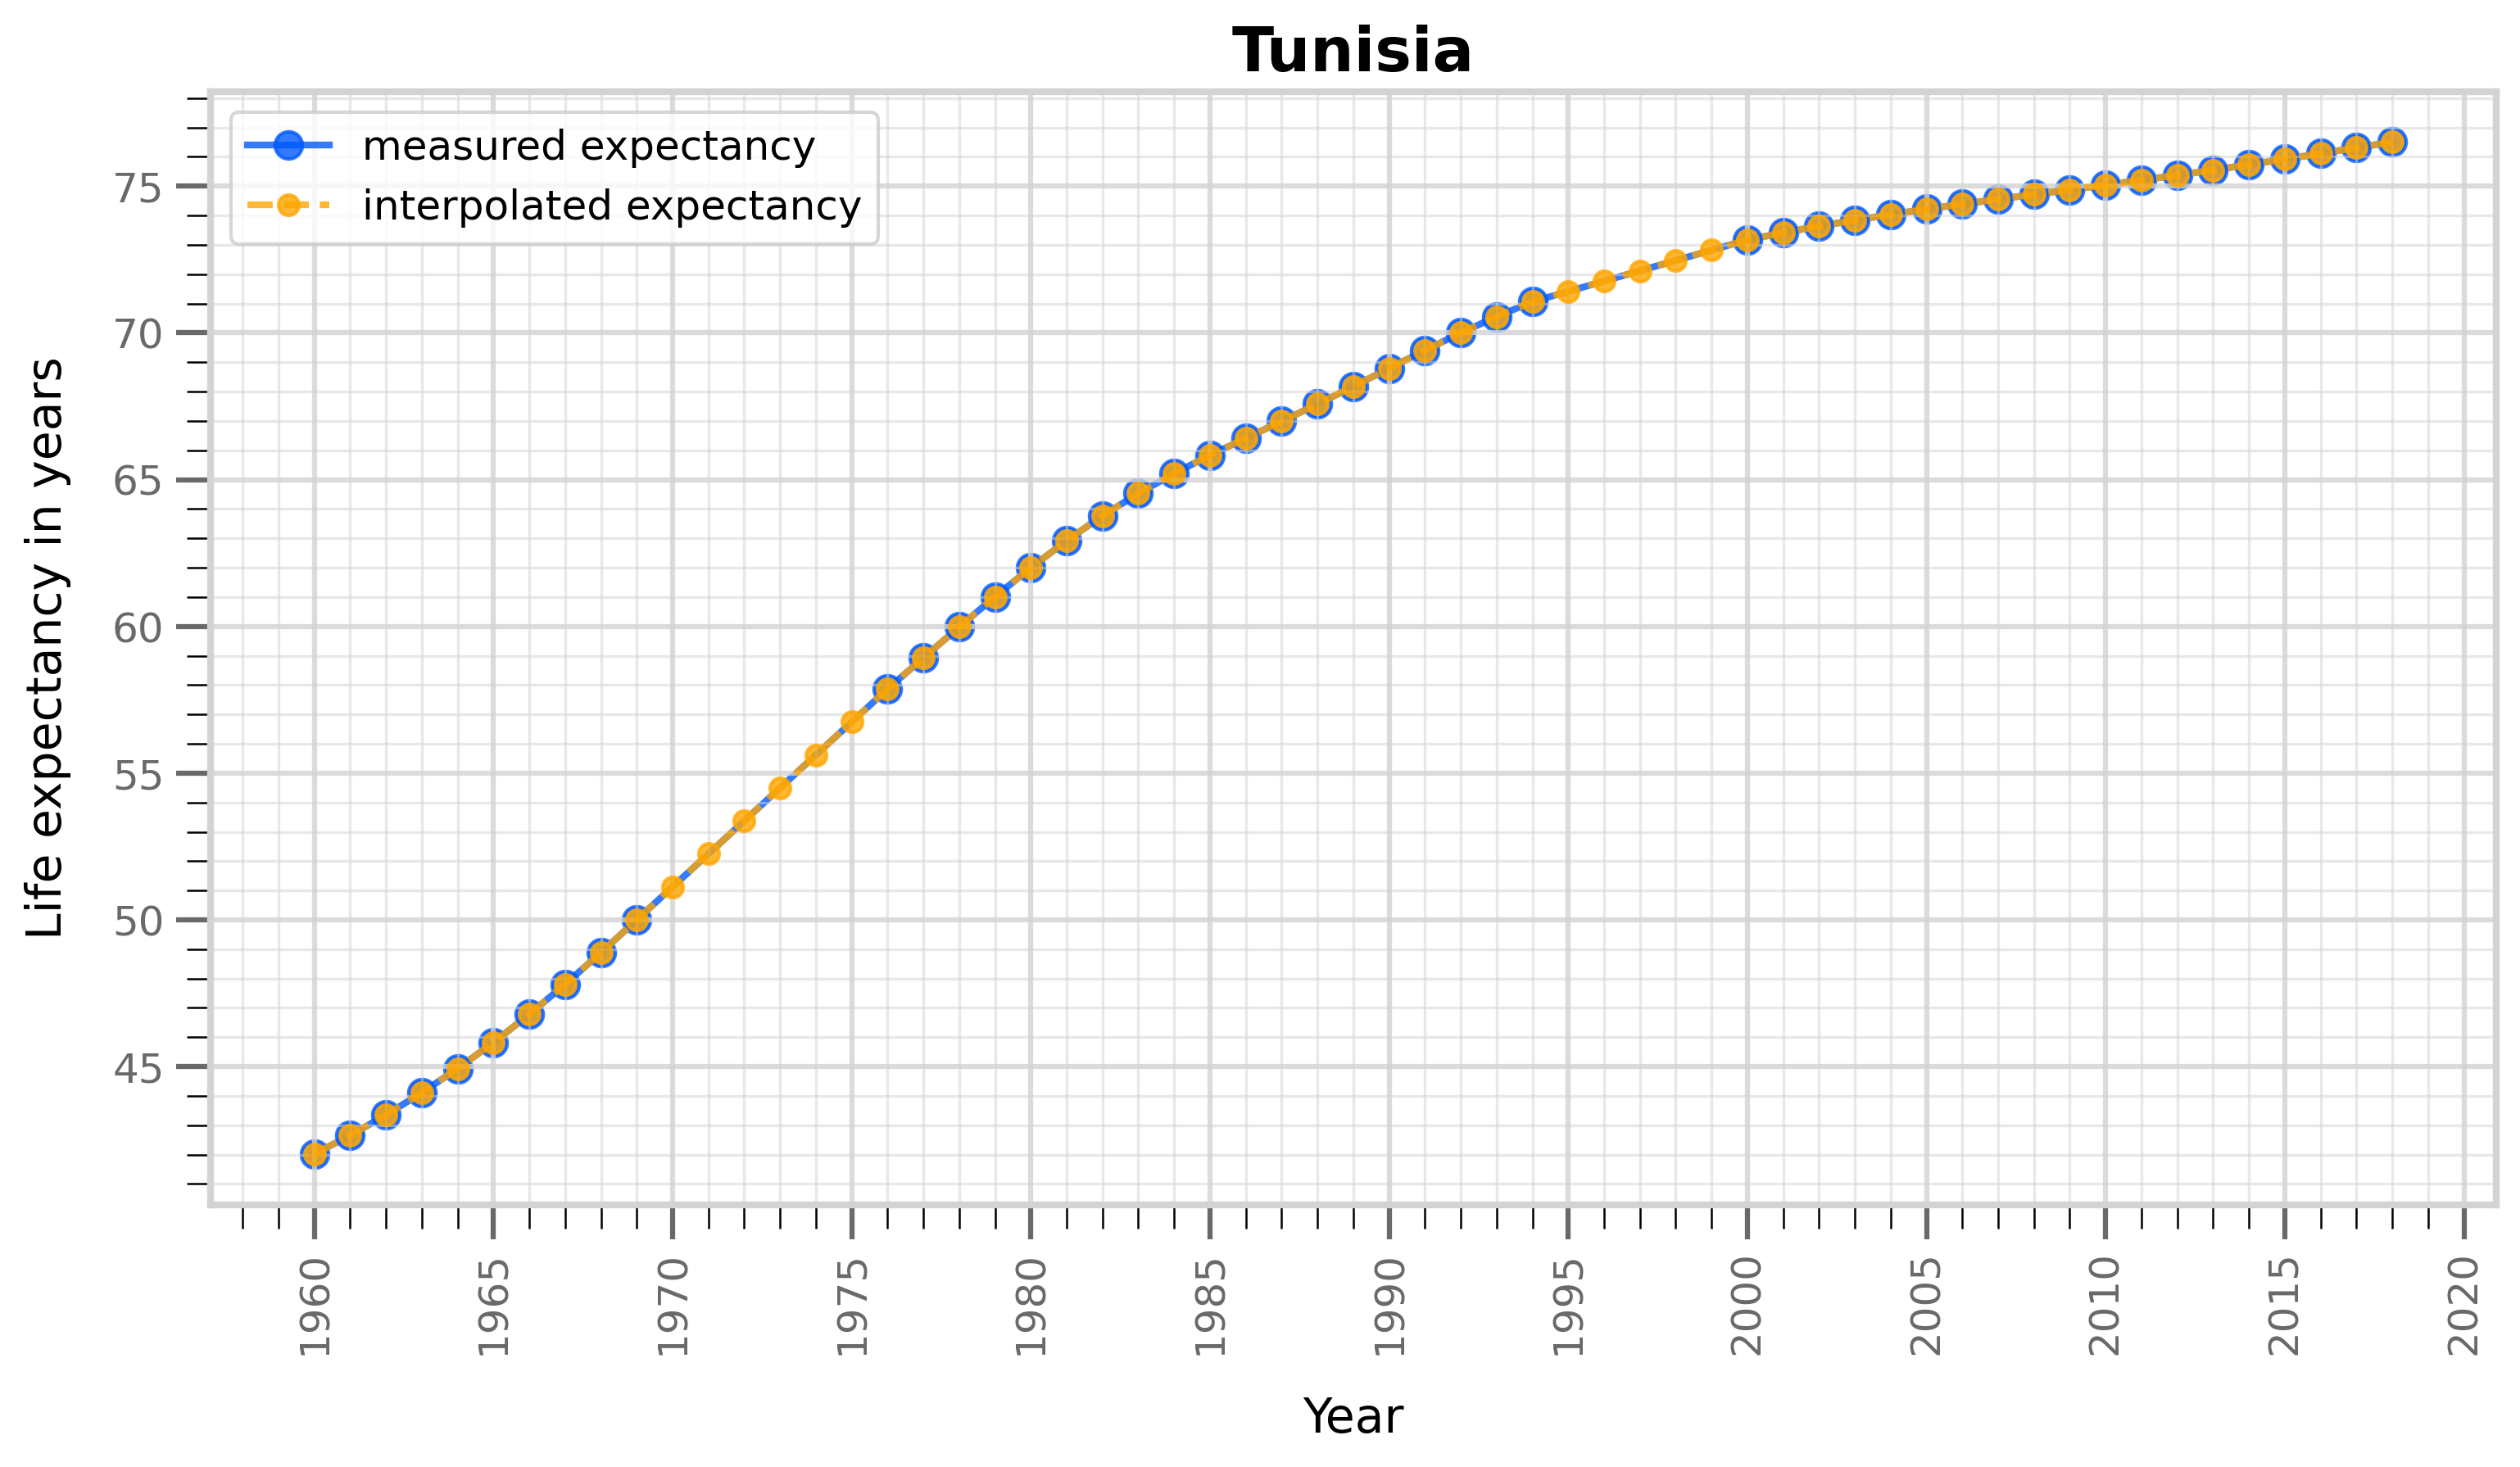

,Country Name,Missing Year,Interpolated Life Expectancy
0,Indonesia,1970,52.528286
1,Indonesia,1971,53.093571
2,Indonesia,1972,53.658857
3,Indonesia,1973,54.224143
4,Indonesia,1974,54.789429
5,Indonesia,1975,55.354714
6,Indonesia,1995,64.227833
7,Indonesia,1996,64.536667
8,Indonesia,1997,64.845500
9,Indonesia,1998,65.154333


In [12]:

def interpolated_value_lists(
        old_x_values: List[int], new_x_values: List[int],
        old_y_values_lists: List[List[float]]) -> List[List[float]]:
    """
    Creates lists of lists of interpolated y-axis values.
    
    The interpolation is based on two lists of x-axis values, and applied to multiple 
    lists of y-axis-values. For the first list of x-axis values there must already be 
    existing corresponding y-axis values. And for the second list of x-axis values there 
    must not be existing y-axis values; instead these missing y-axis values are going to 
    be created by means of interpolation.
    
    Since list values are processed in the order they are given to this function,
    any order inherent to the input data is transferred to and reflected by the output 
    data.
    
    :param old_x_values: A list of x-axis values for which y-axis values are given.
    :param new_x_values: A list of x-axis values for which no y-axis values exist yet.
    :param old_y_values_lists: A list of lists of y-axis values to individually interpolate.
    
    :return: A list of lists of y-axis values, with missing values filled in.
    """
    check_list_argument(old_x_values, int)
    check_list_argument(new_x_values, int)
    check_list_of_lists_argument(old_y_values_lists, float)

    interpolated_y_value_lists = []

    for old_y_values in old_y_values_lists:
        interpolation_function = interp1d(old_x_values, old_y_values)

        interpolated_y_value_lists.append(
            interpolation_function(new_x_values).tolist()
        )

    return interpolated_y_value_lists


missing_years = list(range(1970, 1976)) + list(range(1995, 2000))
all_years     = sorted(partial_years + missing_years)

# indices of year positions in lists of lists: {1960 : 0, 1961 : 1, ..., 2018 : 58}
year_indices  = dict((value, key) for (key, value) in enumerate(all_years))

country_column    = 'Country Name'
year_column       = 'Missing Year'
expectancy_column = 'Interpolated Life Expectancy'
report_dataframe  = \
    pd.DataFrame({country_column: [], year_column: [], expectancy_column: []})

 
# the order of this list's 1st level corresponds to the order of the countries
# and the order of its 2nd level corresponds to the order of the years
interpolated_expectancy_lists : List[List[float]] = \
    interpolated_value_lists(partial_years, all_years, expectancy_lists)

for country_index in range(len(random_country_dataframe)):
    country = random_country_dataframe.iloc[country_index].loc["Country_Name"]

    # collect missing year data in report dataframe
    for year in missing_years:
        report_dataframe = report_dataframe.append({
            country_column   : country,
            year_column      : year,
            expectancy_column:
                interpolated_expectancy_lists[country_index][year_indices[year]]
        }, ignore_index=True)

    # plot interpolated expectancies over measured expectancies
    plot_two_overlain_data_sets(
        country, "Year", "Life expectancy in years",
        "measured expectancy", "interpolated expectancy",
        partial_years, expectancy_lists[country_index],
        all_years, interpolated_expectancy_lists[country_index]
    )

report_dataframe[year_column] = report_dataframe[year_column].astype(int)

print("\n\n")
report_dataframe